In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

import the train and test datasets

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

make a copy of the datasets

In [3]:
train_original = train_data.copy()
test_original = test_data.copy()

exploring the five rows of train data. 

In [4]:

print(train_data.shape)
train_data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

exploring the five rows of test data

In [5]:
print(test_data.shape)
test_data.head()

(1459, 80)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

### Data Cleaning 

checking duplicates 

In [6]:
train_data.duplicated().sum()

0

In [7]:
test_data.duplicated().sum()

0

checking missing values

In [8]:
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
test_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Visualization to missing value exploration

<AxesSubplot:>

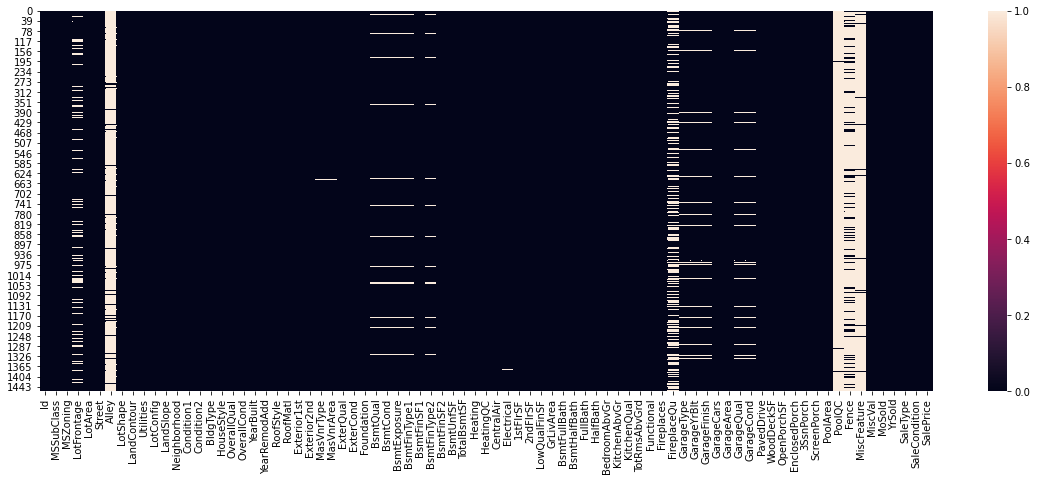

In [10]:
plt.figure(figsize=(20, 7))
sns.heatmap(train_data.isnull())

<AxesSubplot:>

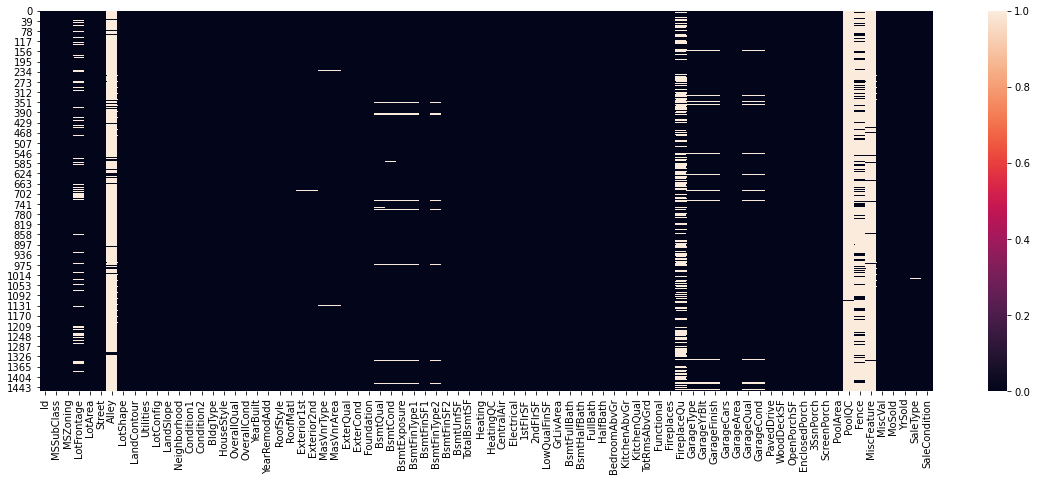

In [11]:
plt.figure(figsize=(20, 7))
sns.heatmap(test_data.isnull())

In [12]:
all_null_values = (train_data.isnull().sum() / len(train_data)) * 100
null_values_grter_50_percent = all_null_values.drop(all_null_values[all_null_values < 50.0].index)
all_null_values = round(null_values_grter_50_percent.sort_values(ascending=False), 2)
missing_data = pd.DataFrame({'Percente of null values(train)' :all_null_values})
missing_data.head(100)

Percente of null values(train)
PoolQC                                99.52
MiscFeature                           96.30
Alley                                 93.77
Fence                                 80.75

In [13]:
all_null_values = (test_data.isnull().sum()/len(test_data)) * 100
null_values_grter_50_percent = all_null_values.drop(all_null_values[all_null_values < 50.0].index)
all_null_values = round(null_values_grter_50_percent.sort_values(ascending=False), 2)
missing_data = pd.DataFrame({'Percente of null values(test)' :all_null_values})
missing_data.head(100)

Percente of null values(test)
PoolQC                               99.79
MiscFeature                          96.50
Alley                                92.67
Fence                                80.12
FireplaceQu                          50.03

drop columns with more that 50% missing values 

In [14]:
train_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)
test_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

In [15]:
print('total missing in train data: ',train_data.isna().sum().sum())
print('total missing in test data: ',test_data.isna().sum().sum())

total missing in train data:  868
total missing in test data:  885


fill the remaining missing with median 

In [16]:
train_data = train_data.fillna(train_data.median())
test_data = test_data.fillna(test_data.median())

In [17]:
print('total missing in train data: ',train_data.isna().sum().sum())
print('total missing in test data: ',test_data.isna().sum().sum())

total missing in train data:  520
total missing in test data:  555


In [18]:
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

In [19]:
print('total missing in train data: ',train_data.isna().sum().sum())
print('total missing in test data: ',test_data.isna().sum().sum())

total missing in train data:  0
total missing in test data:  0


### EDA

In [20]:
categorical_df = train_data.select_dtypes(include=['object'])
print(categorical_df.shape)
categorical_df.head()

(1460, 38)


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  
0         TA         TA          Y       WD        Normal  
1         TA         TA          Y       WD        Normal  
2         TA         TA          Y       WD        Normal  
3         TA         TA          Y       WD       Abnorml  
4         TA         TA          Y       WD        Normal

In [21]:
numerical_df = train_data.select_dtypes(exclude=['object'])
print(numerical_df.shape)
numerical_df.head()

(1460, 38)


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

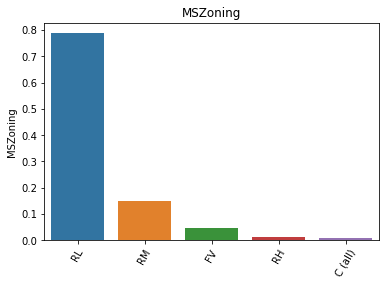

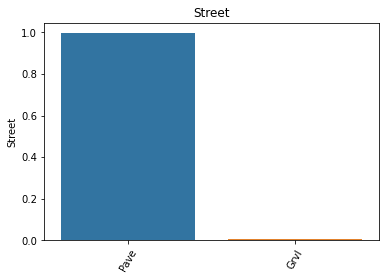

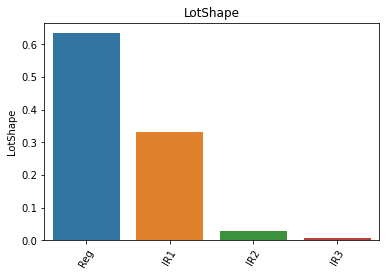

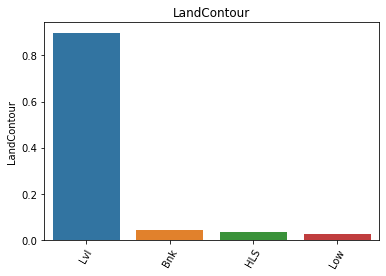

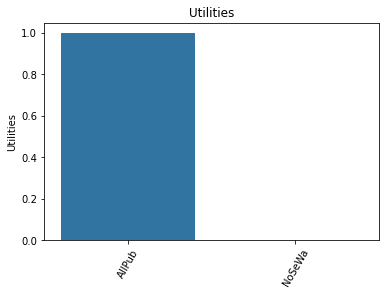

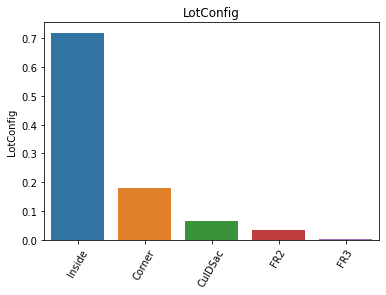

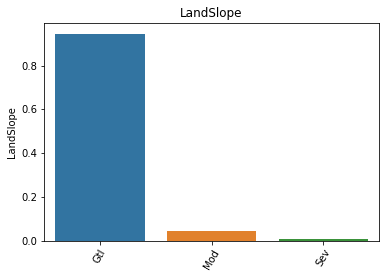

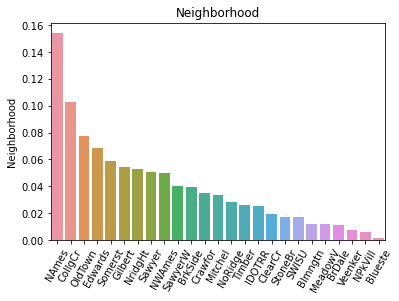

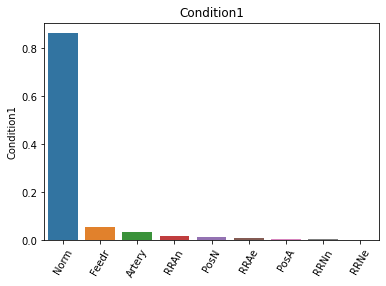

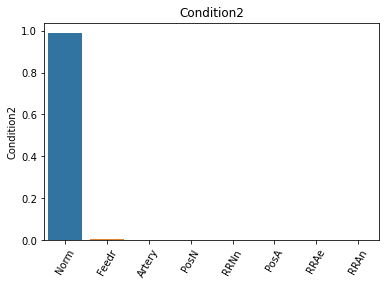

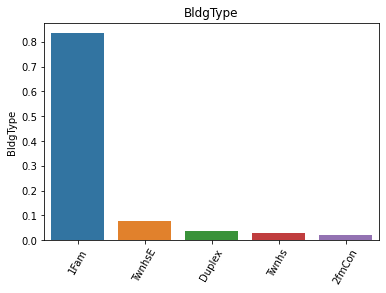

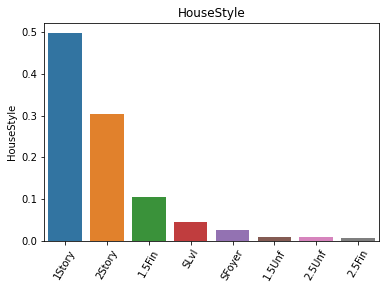

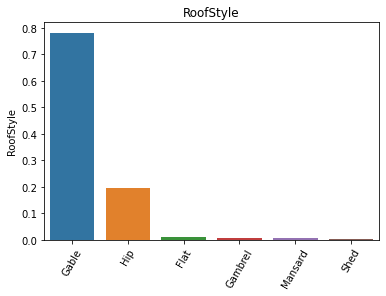

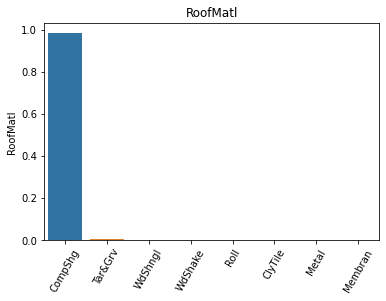

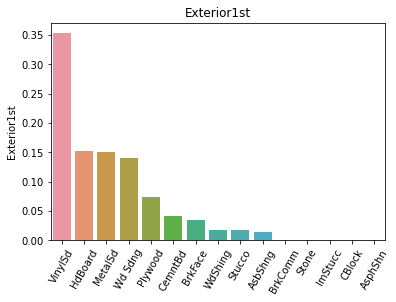

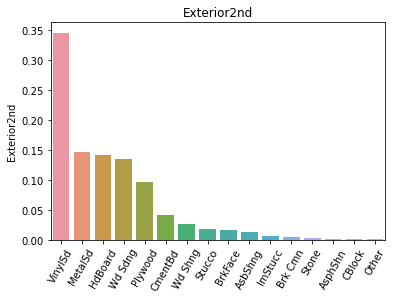

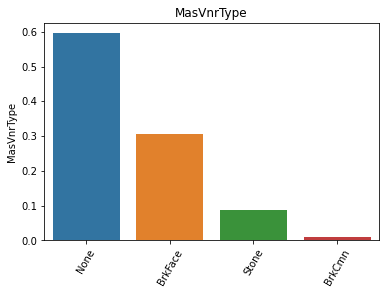

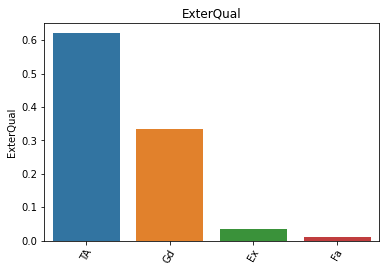

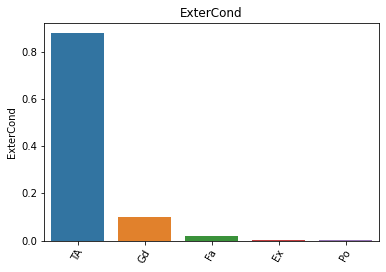

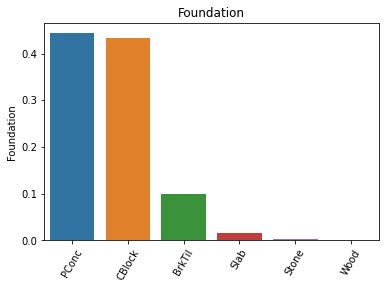

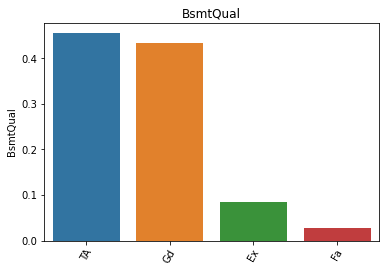

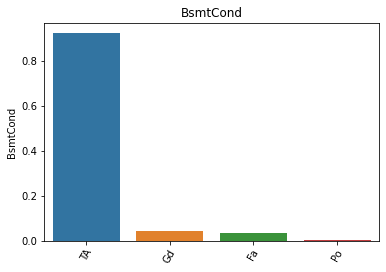

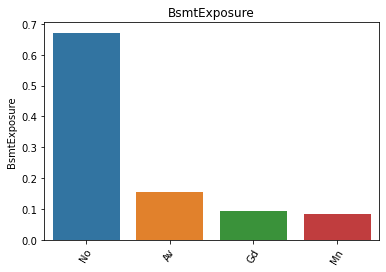

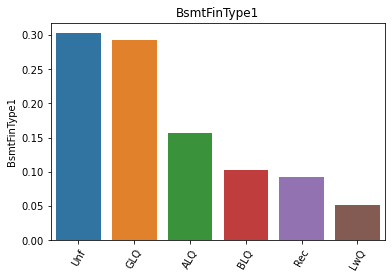

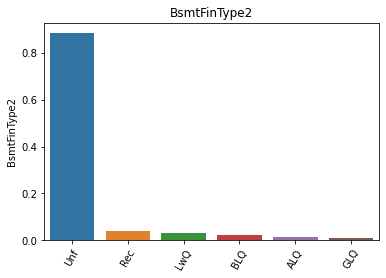

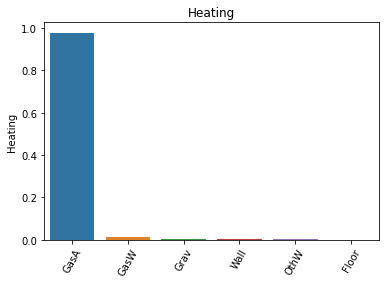

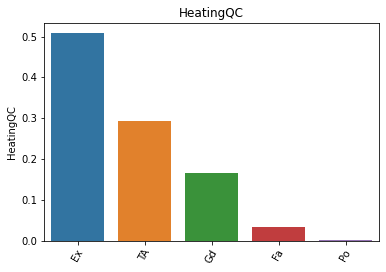

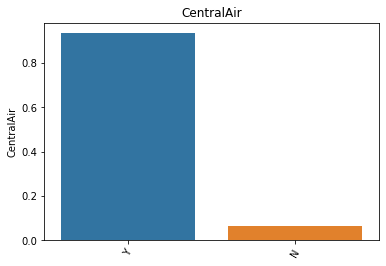

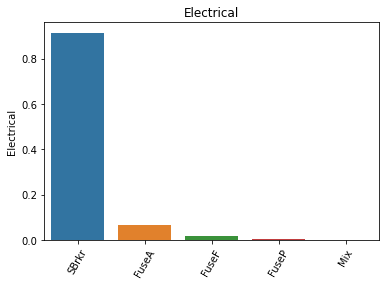

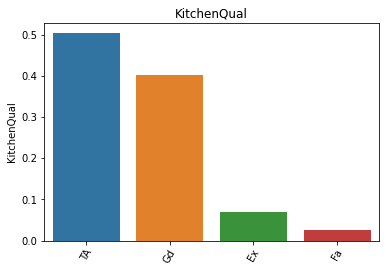

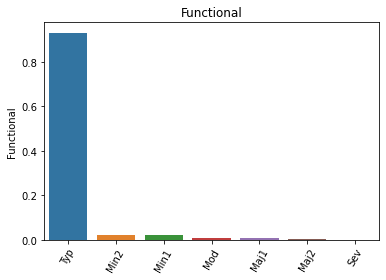

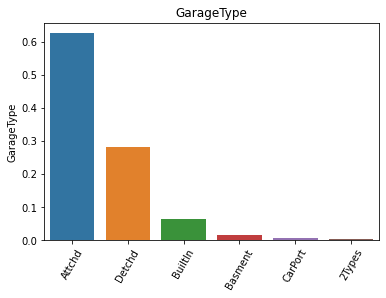

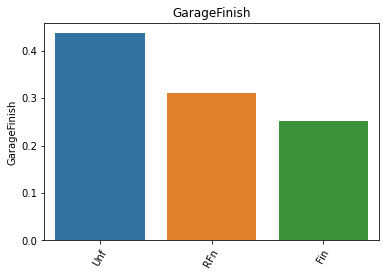

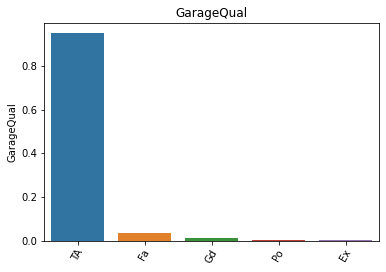

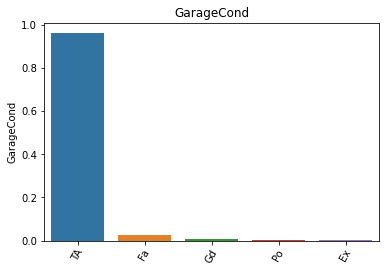

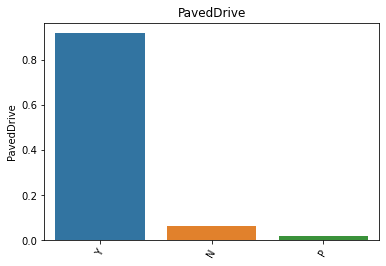

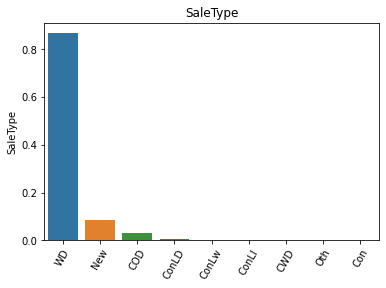

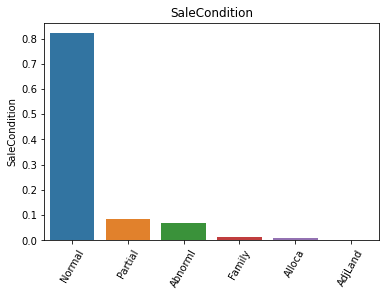

In [22]:

def bar():
    fig =  plt.subplots()
    for feature in categorical_df:
        cat = train_data[feature].value_counts(normalize=True) # this hould make the adjust the scoop of to the vie
        chart = sns.barplot(cat.index , cat)
        chart.set_xticklabels(chart.get_xticklabels() , rotation = 60)

        plt.title(feature)
        plt.show()
bar()

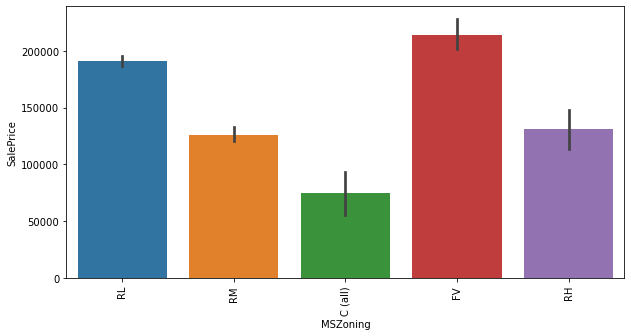

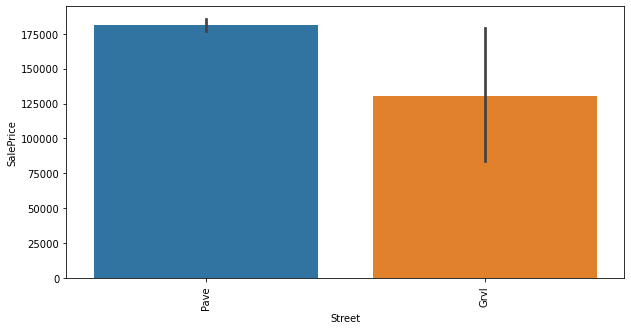

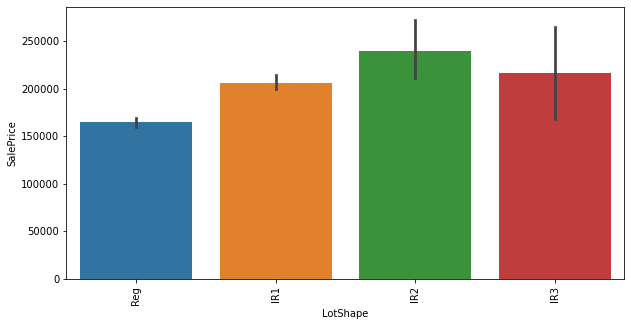

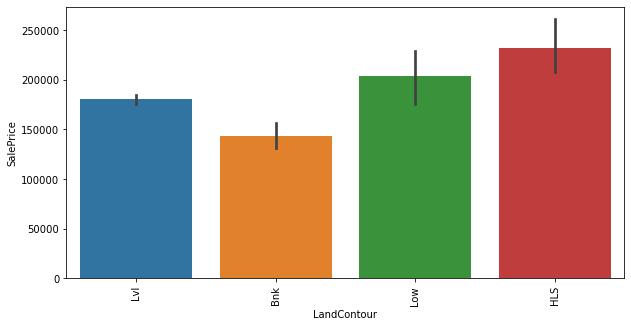

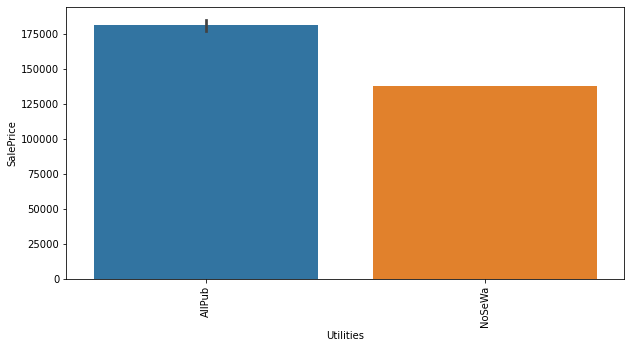

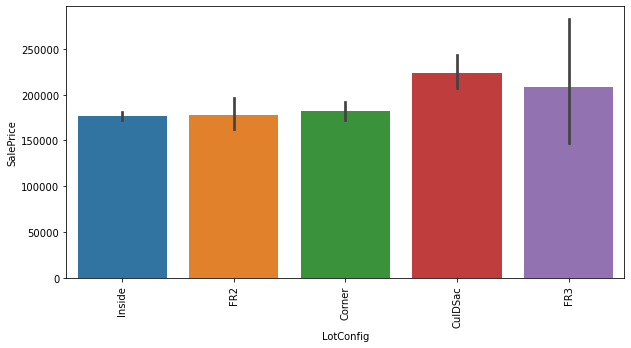

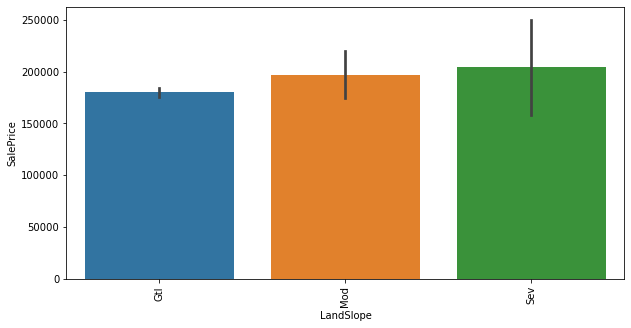

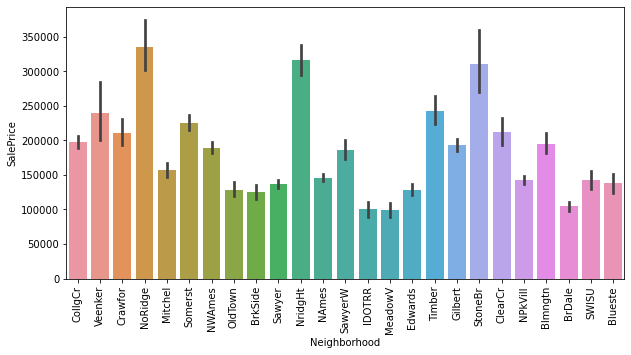

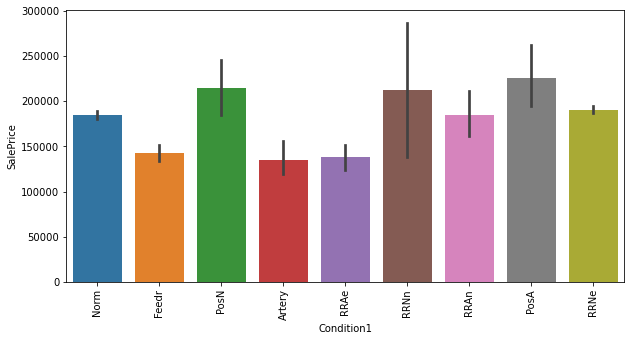

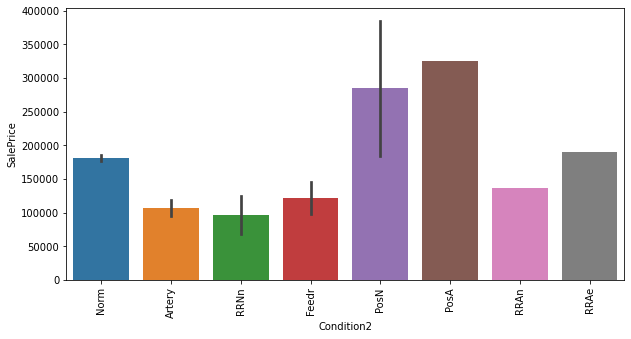

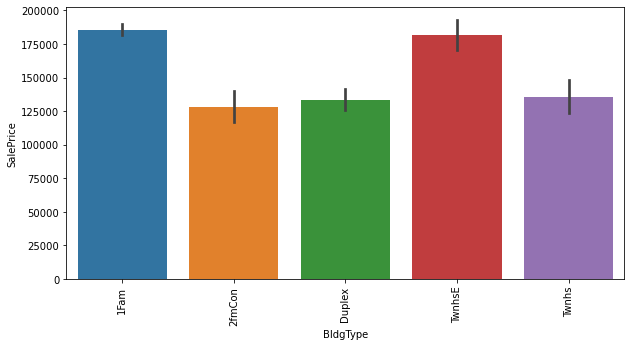

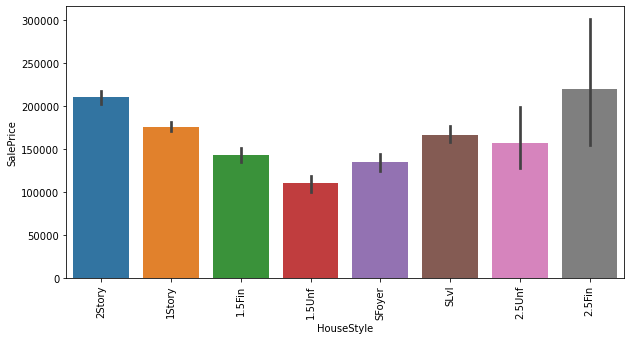

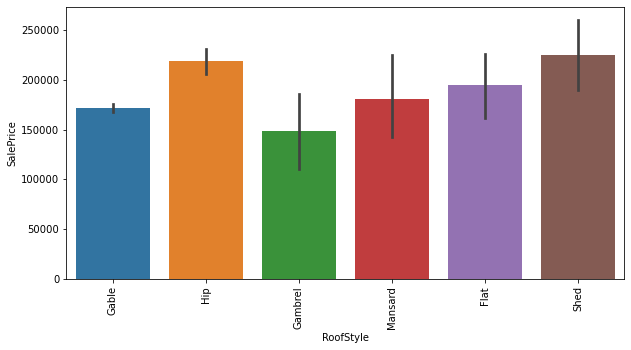

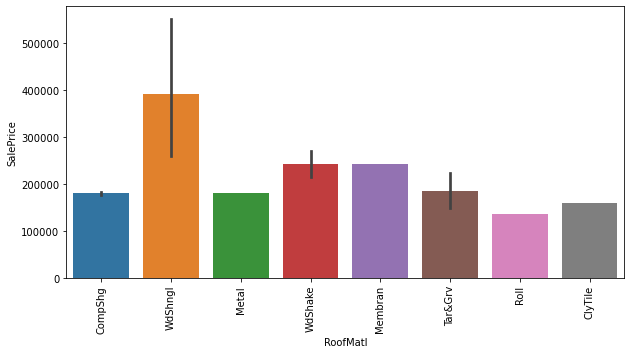

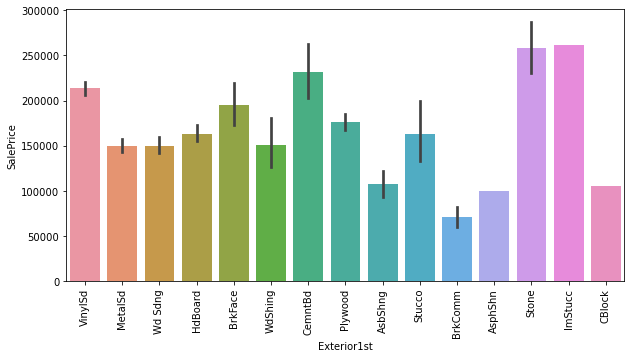

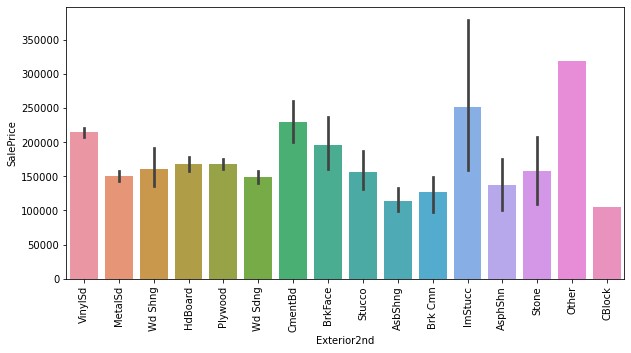

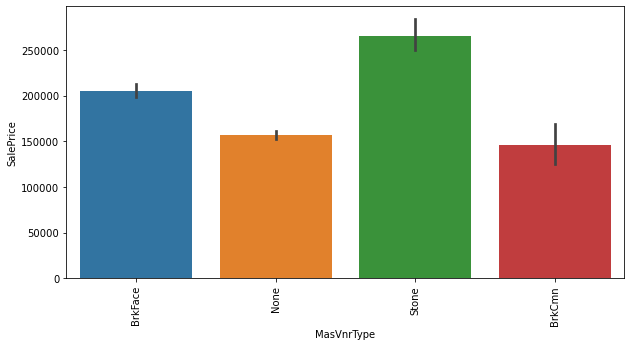

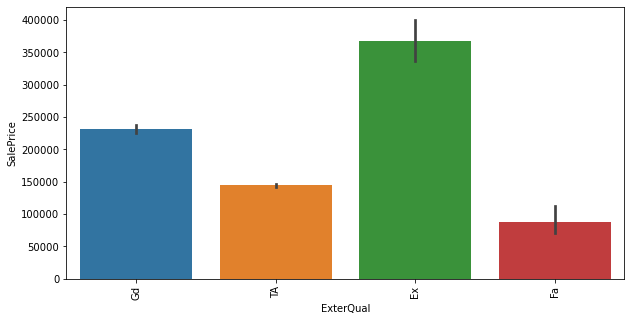

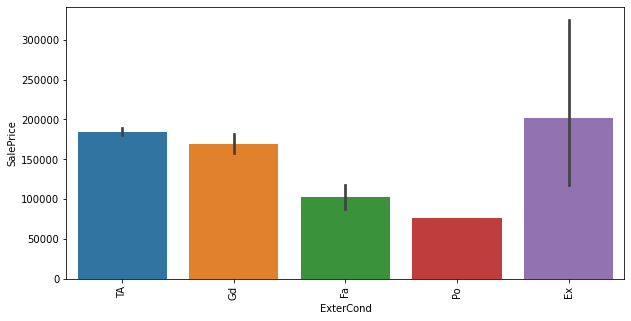

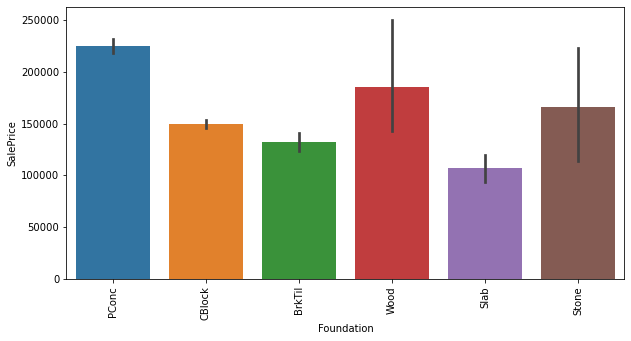

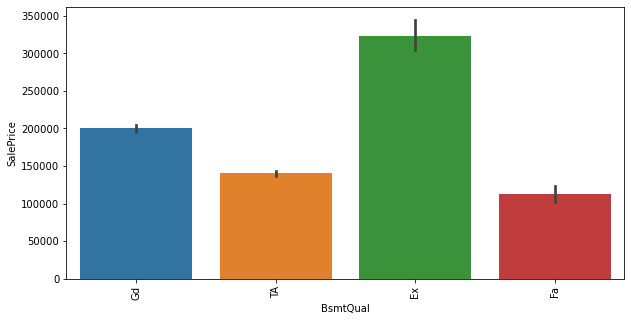

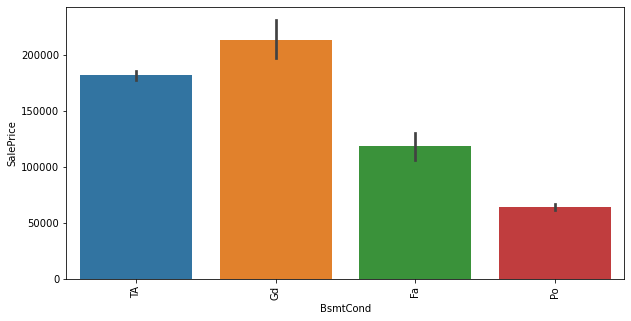

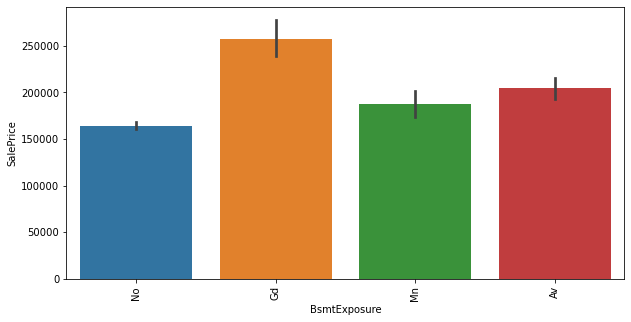

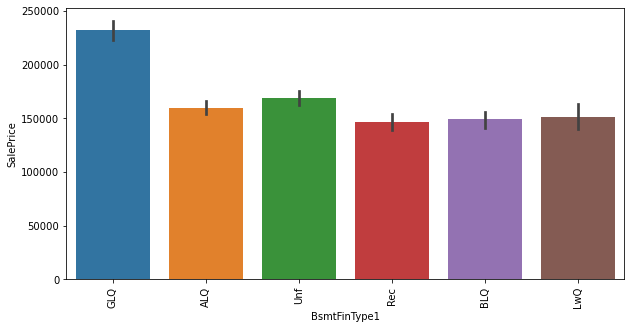

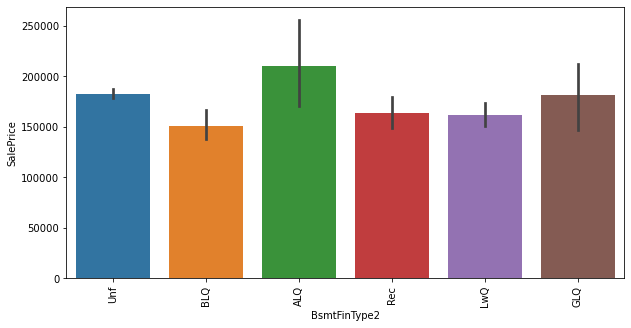

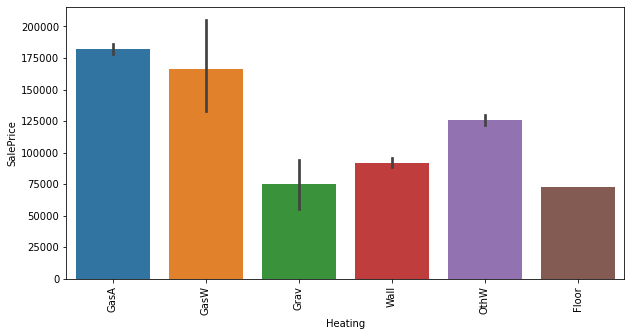

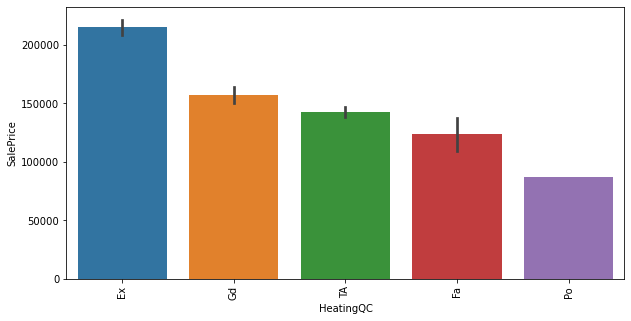

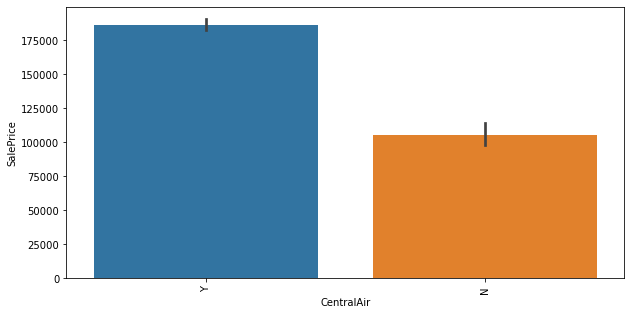

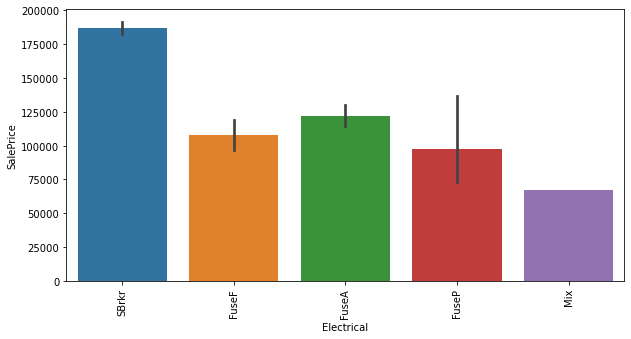

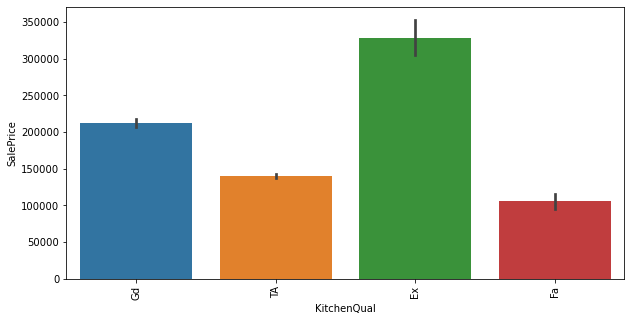

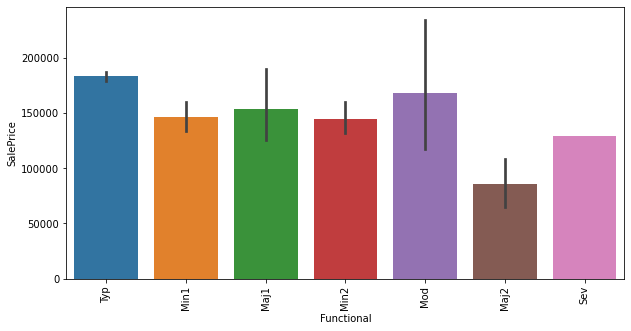

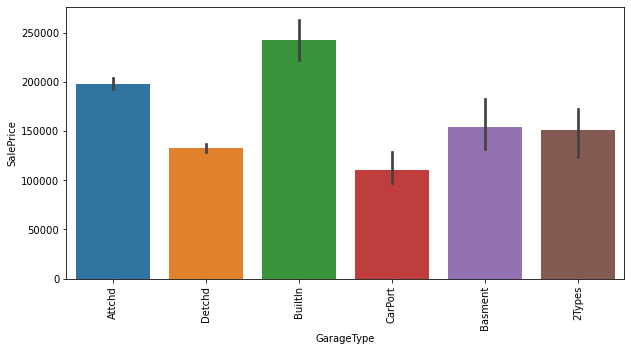

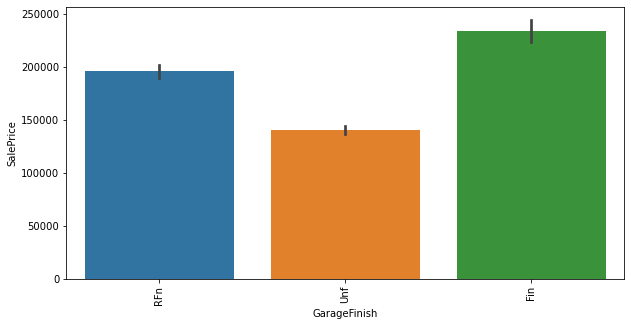

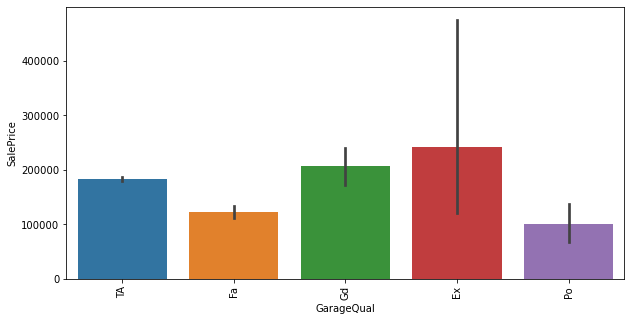

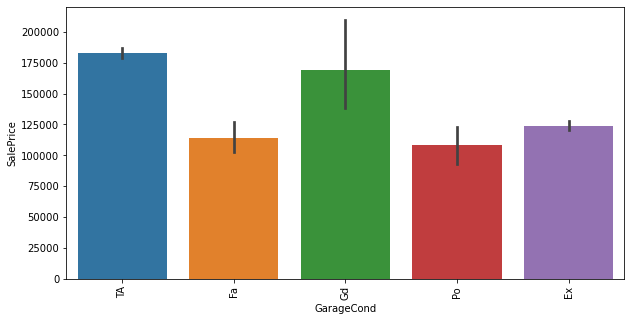

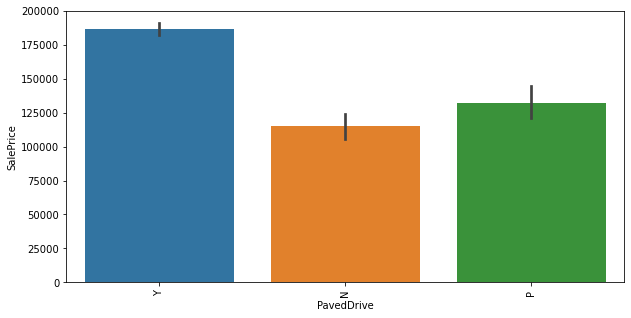

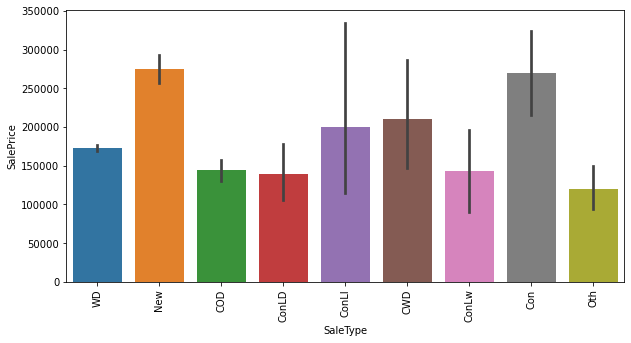

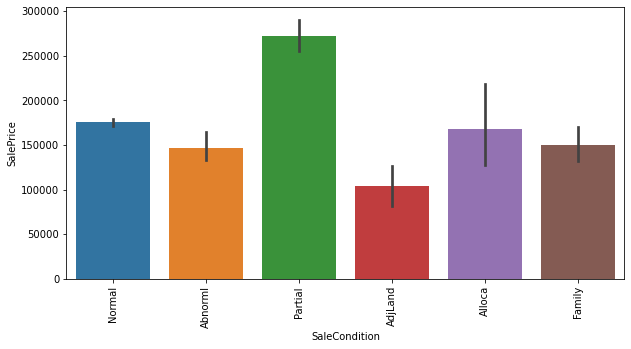

In [23]:
target = train_data.SalePrice
for col in categorical_df.columns:
    plt.figure(figsize=(10, 5))
    cat_feat = train_data[col]
    sns.barplot(x=cat_feat, y=target)
    plt.xticks(rotation=90)
    

Comparative Bar graphs

In [24]:
categorical_df['SalePrice']=train_data.SalePrice
train_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [25]:
bins = [0,130000,163000,214000,755000]
group=['Low','Average','High', 'Very High'] 
categorical_df['price_cat'] = pd.cut(categorical_df['SalePrice'], bins, labels=group)
categorical_df.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  SalePrice  \
0         TA         TA          Y       WD        Normal     208500   
1         TA         TA          Y       WD        Normal     181500   
2         TA         TA          Y       WD        Normal     223500   
3         TA         TA          Y       WD       Abnorml     140000   
4         TA         TA          Y       WD        Normal     250000   

   price_cat  
0       High  
1       High  
2  Very High  
3    Average  
4  Very High

In [26]:
categorical_df_1 = categorical_df.drop(['SalePrice','price_cat'], 1)
price_cat = categorical_df.price_cat

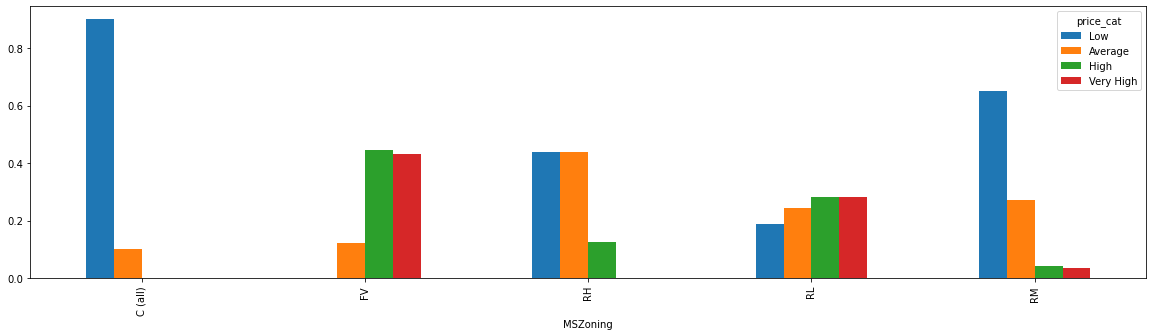

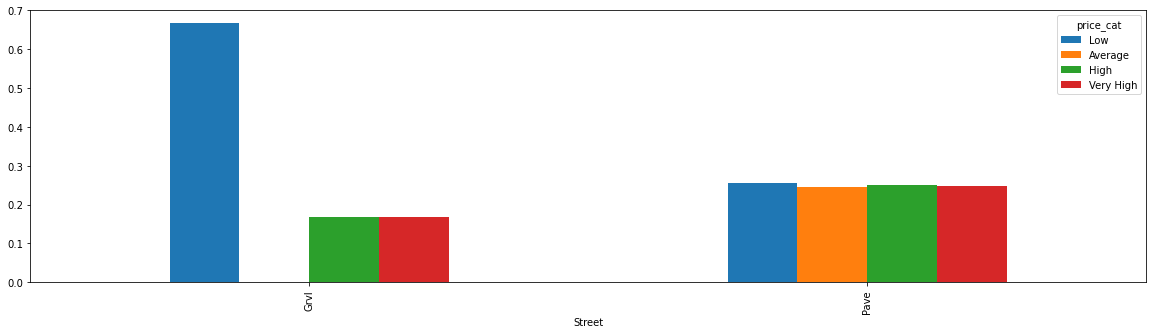

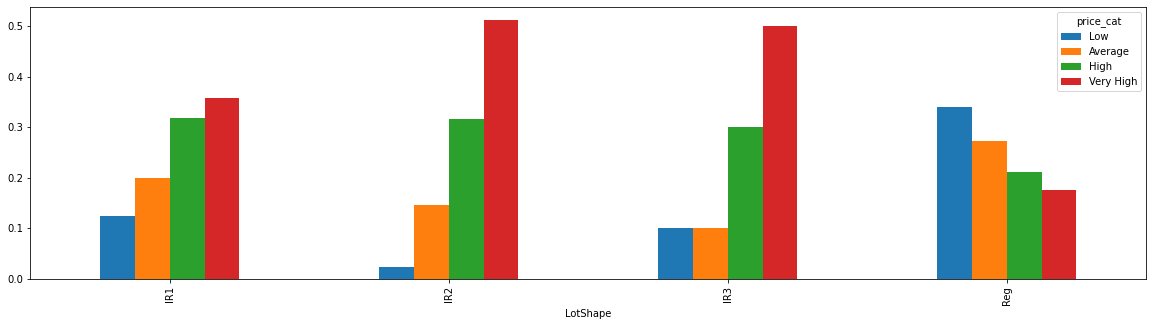

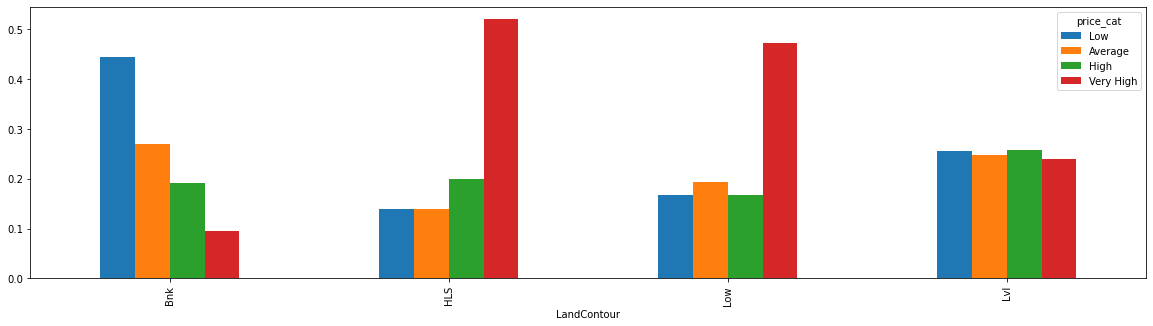

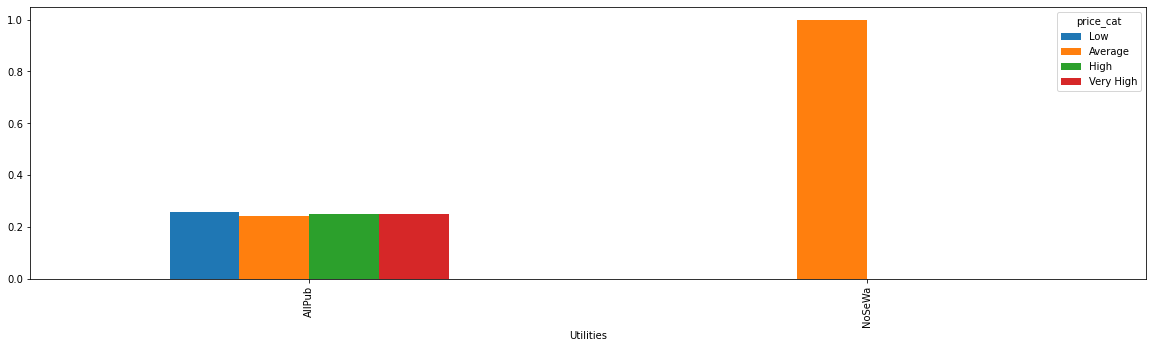

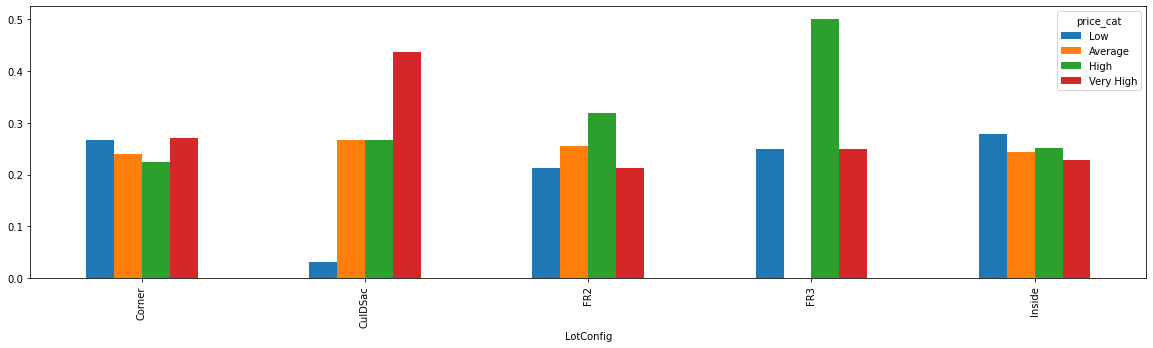

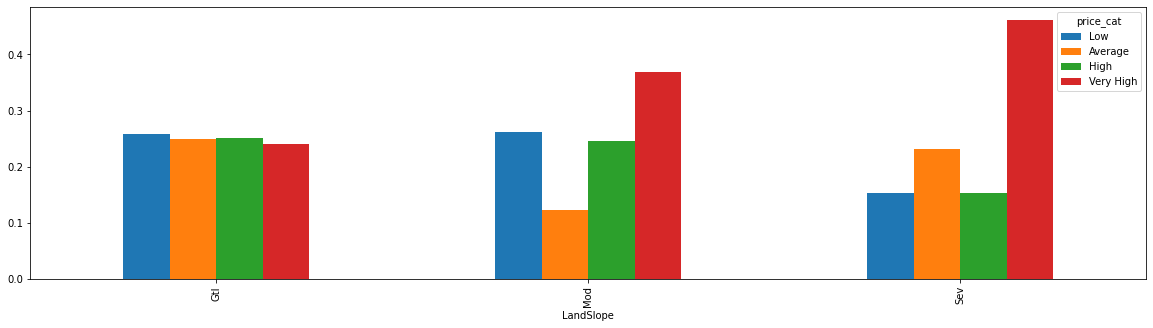

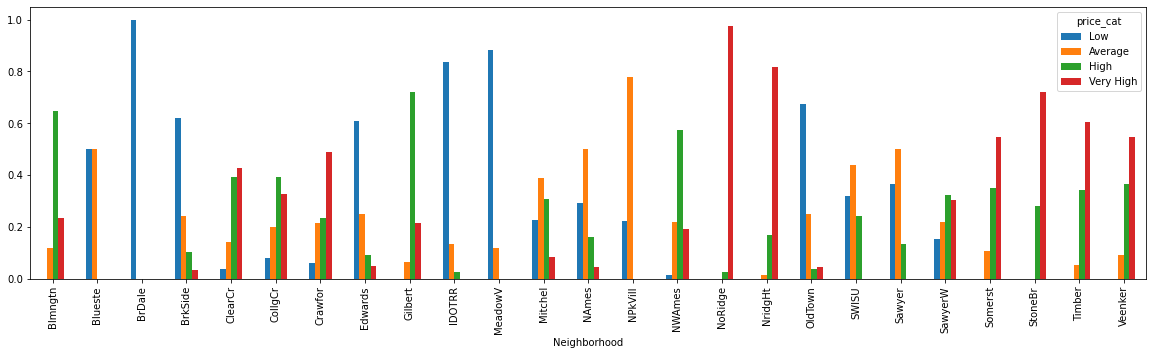

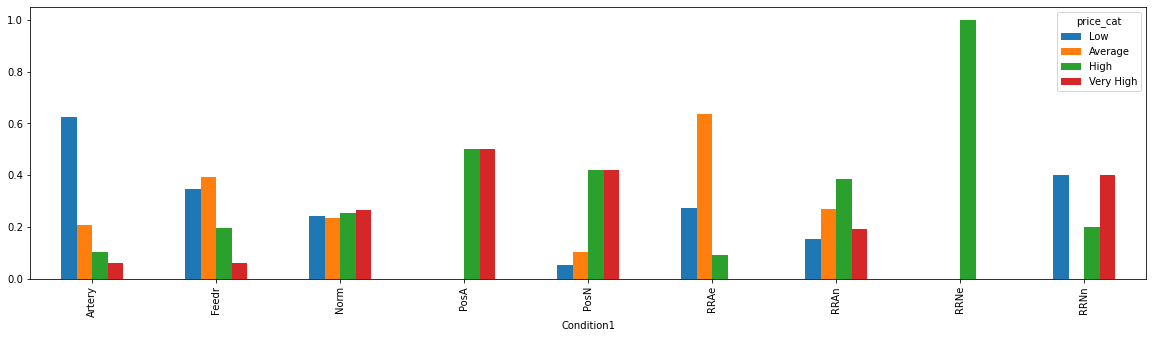

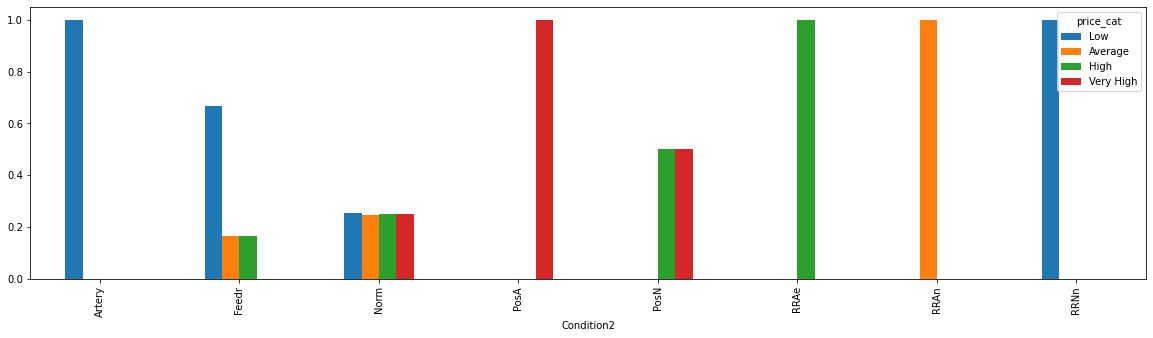

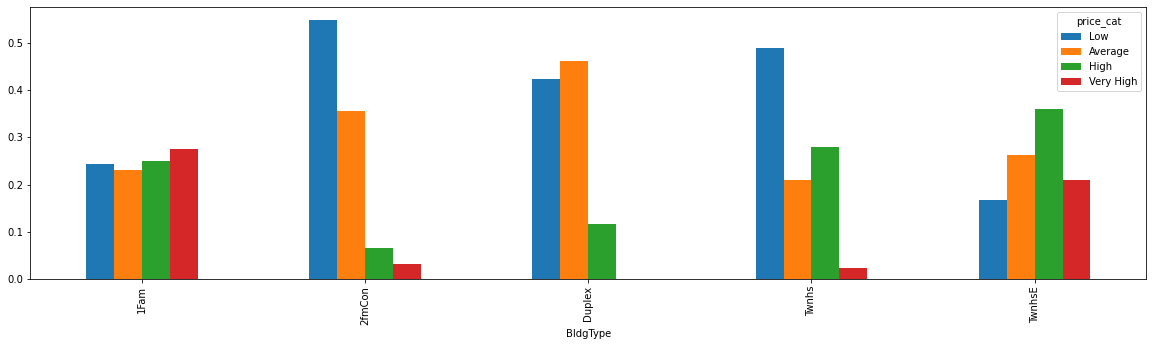

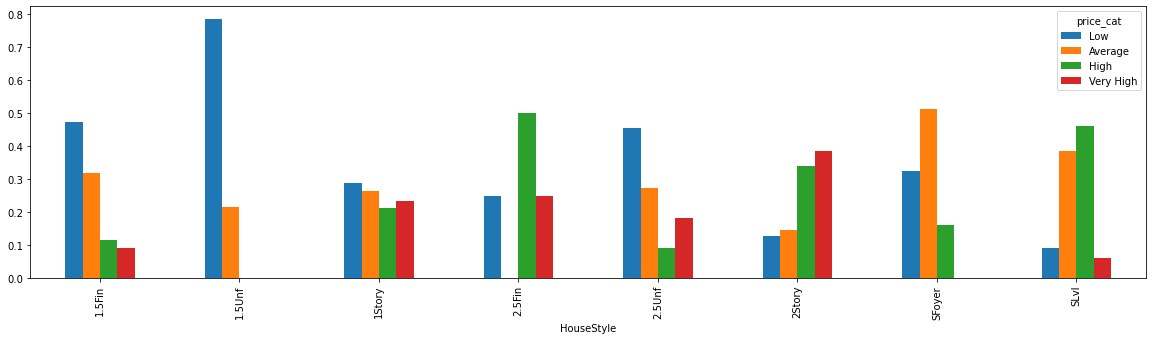

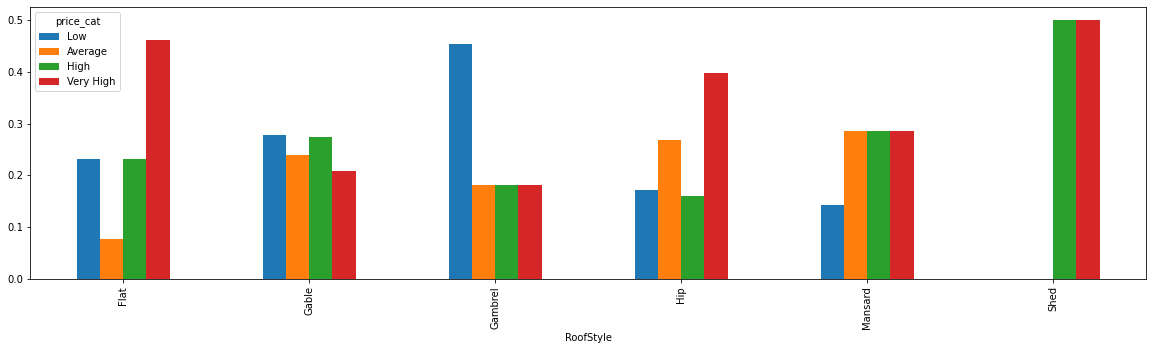

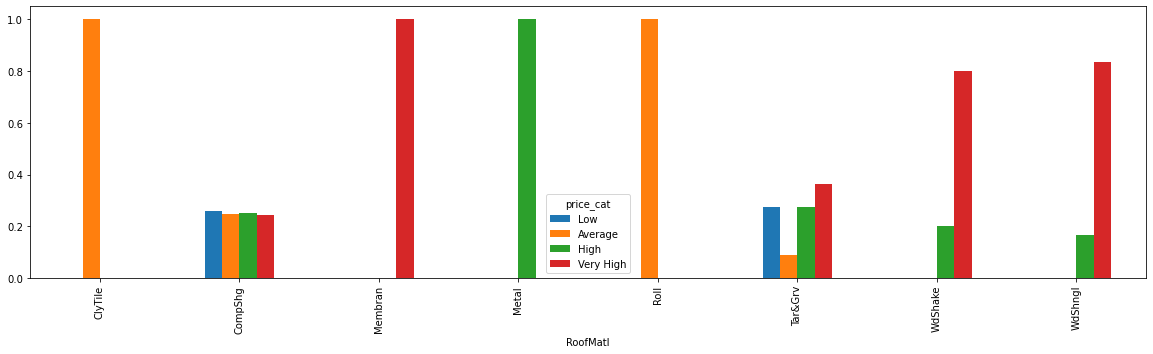

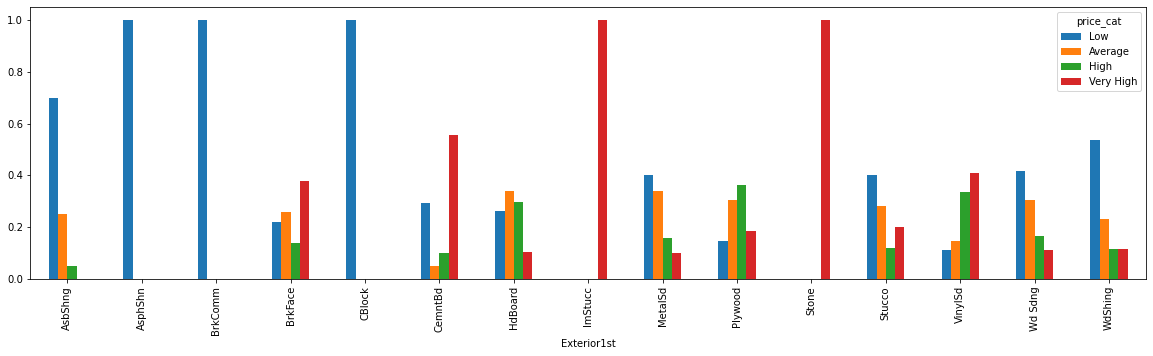

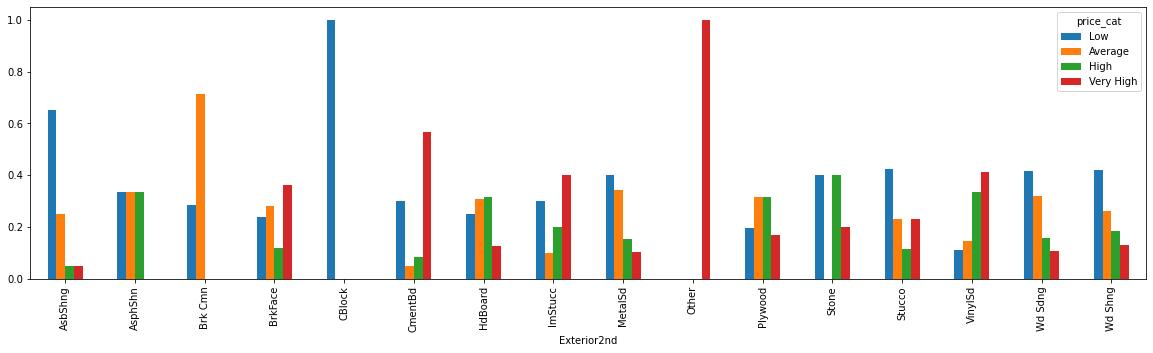

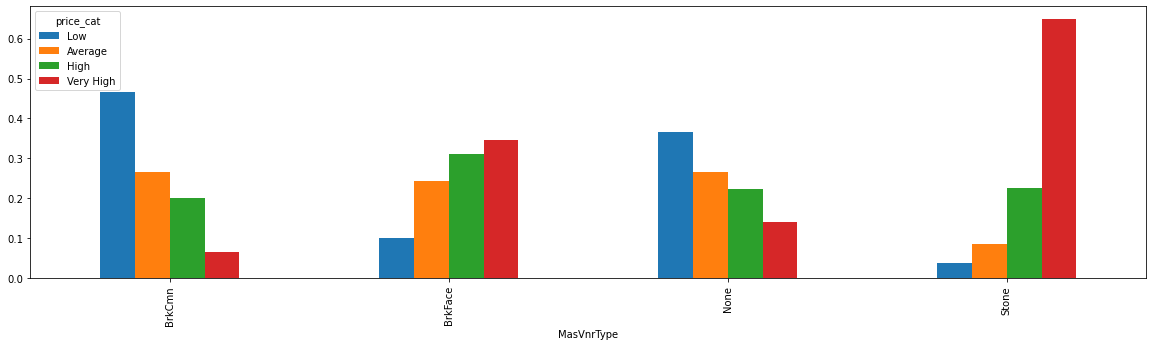

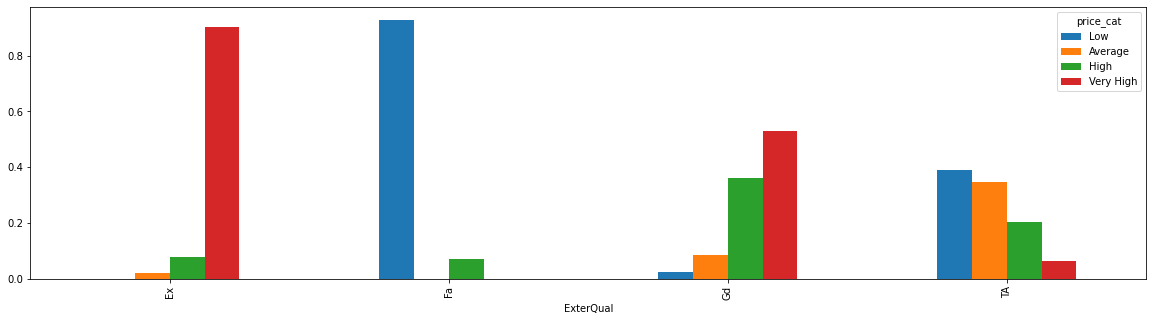

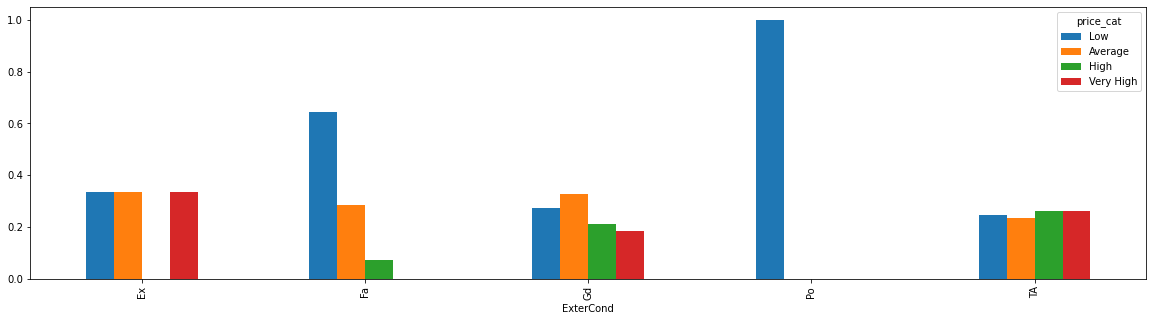

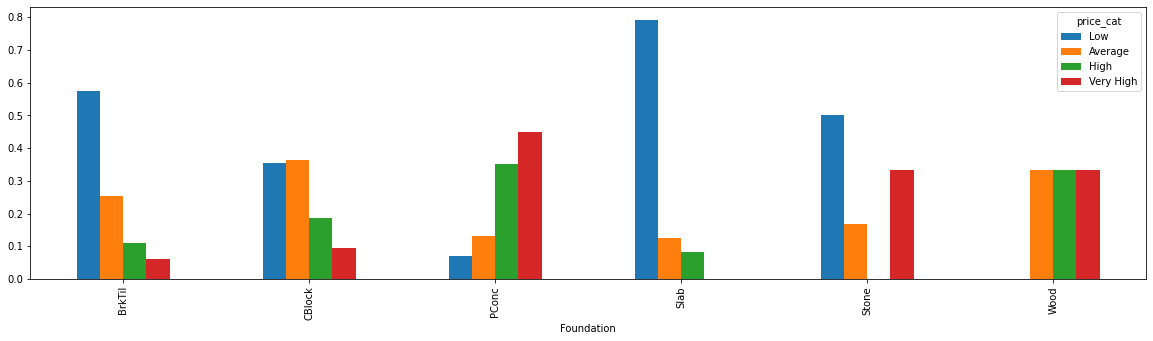

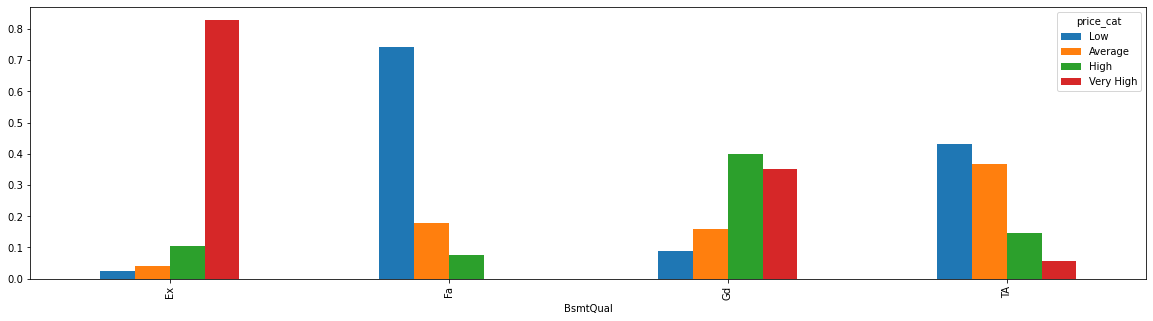

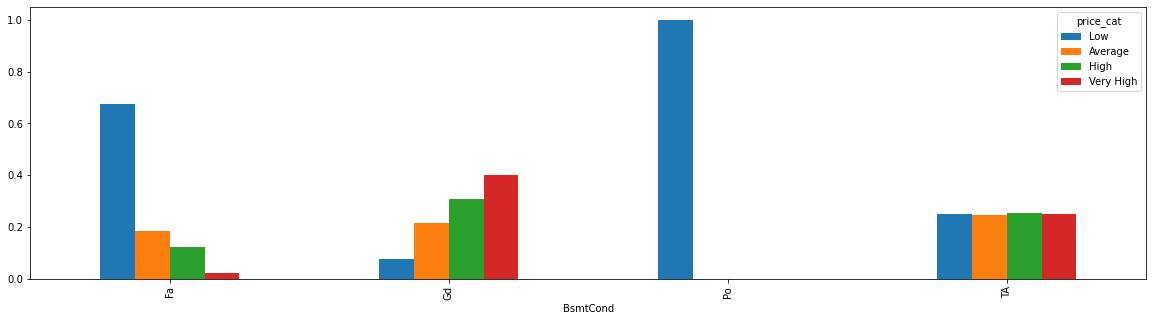

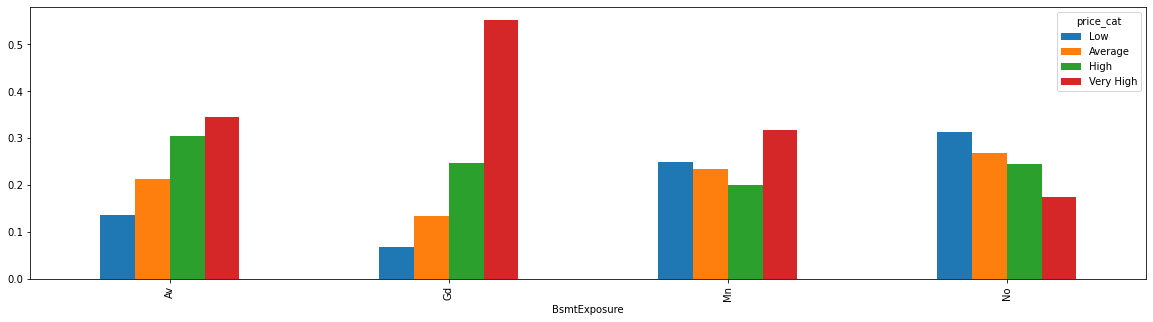

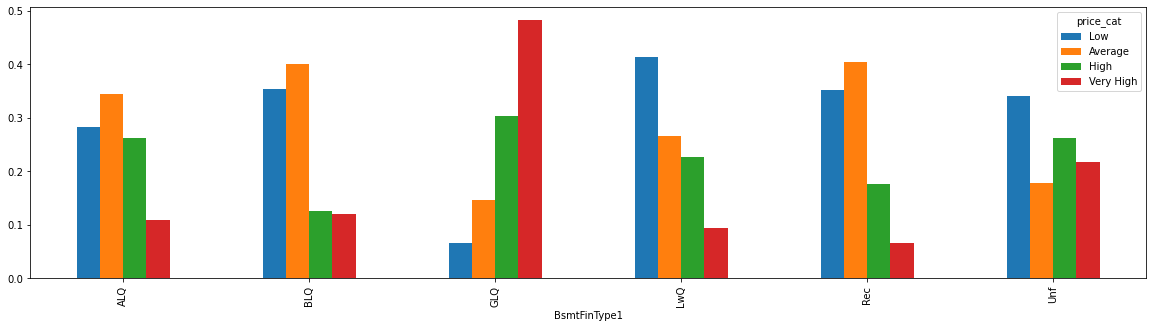

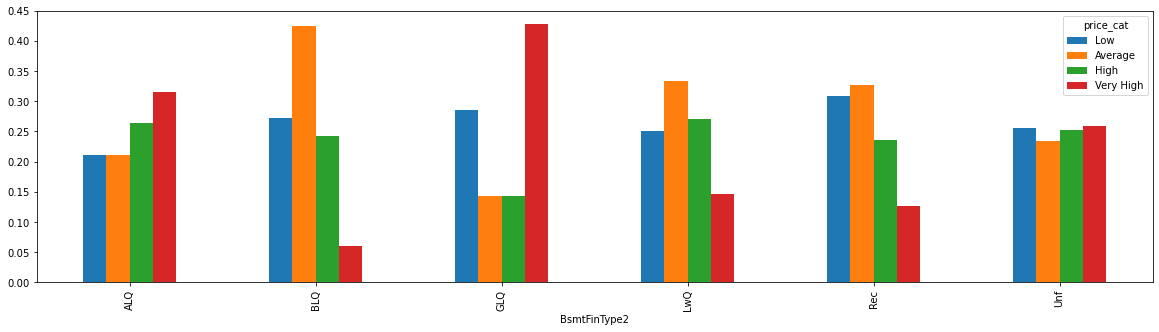

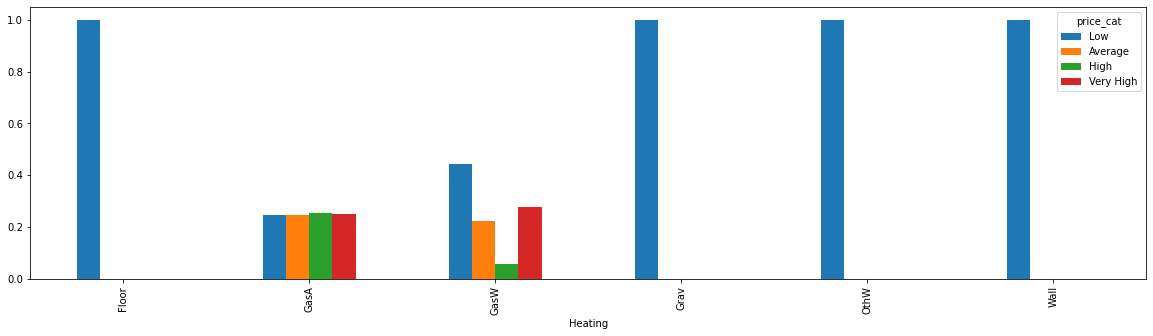

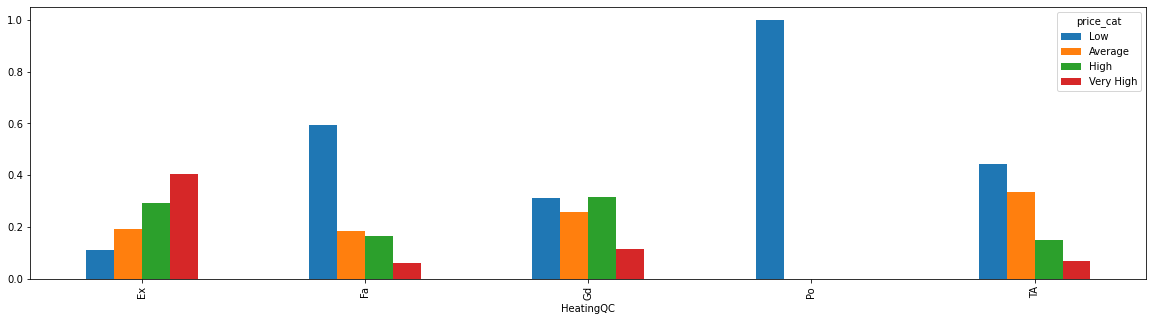

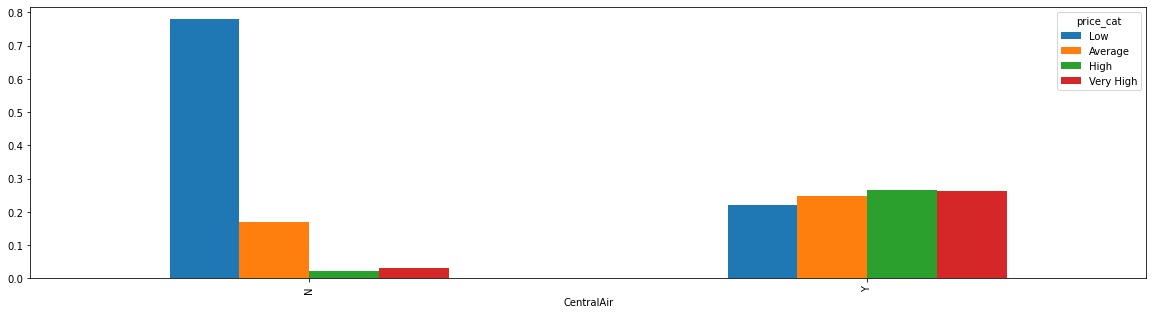

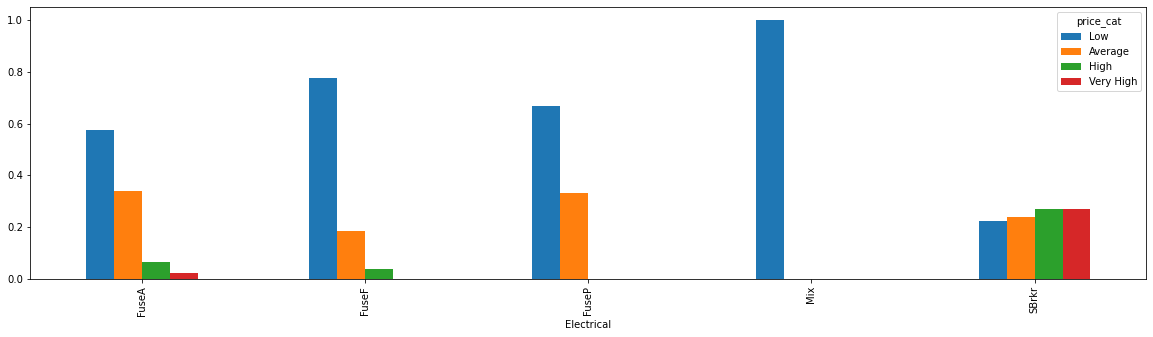

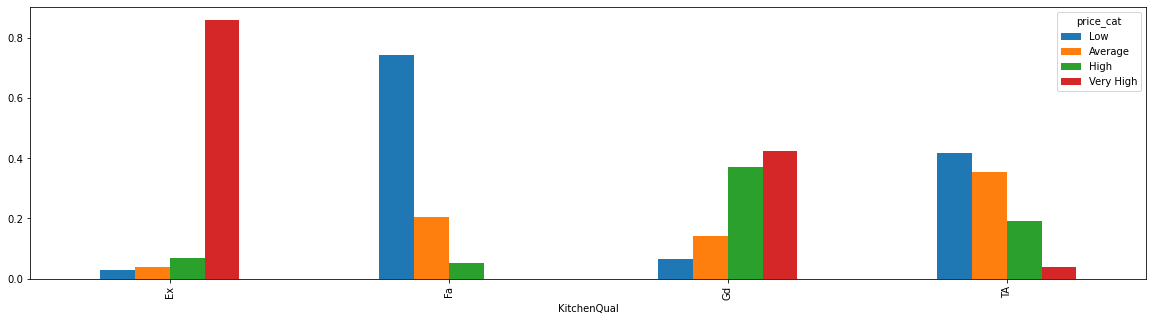

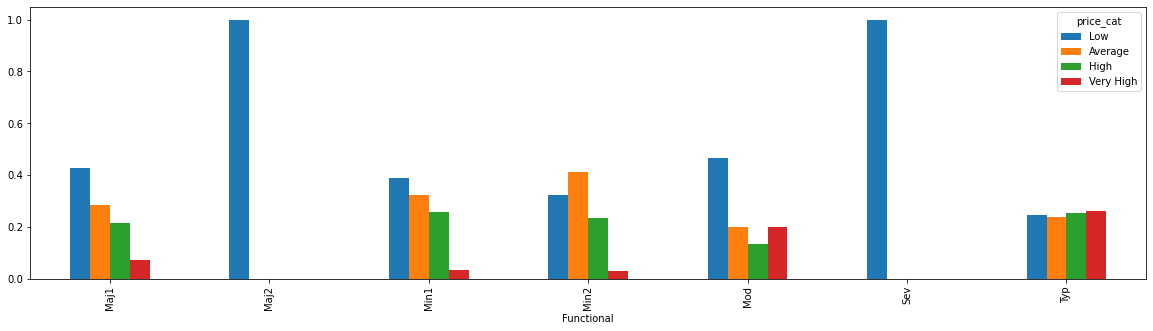

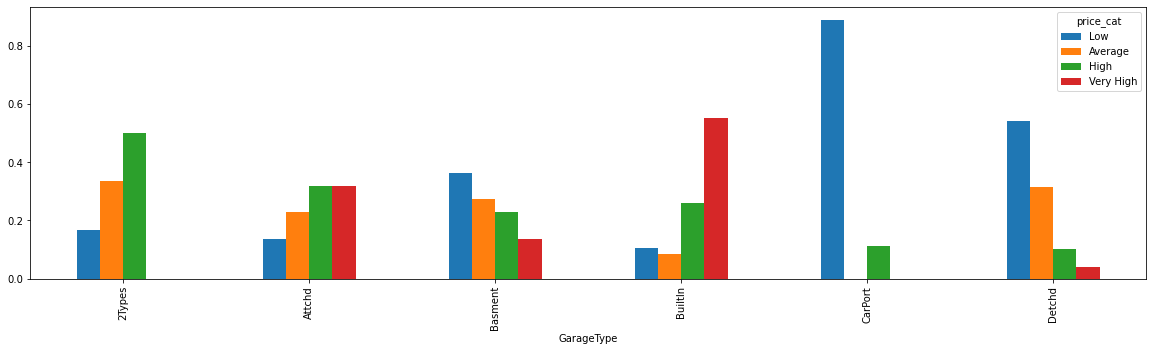

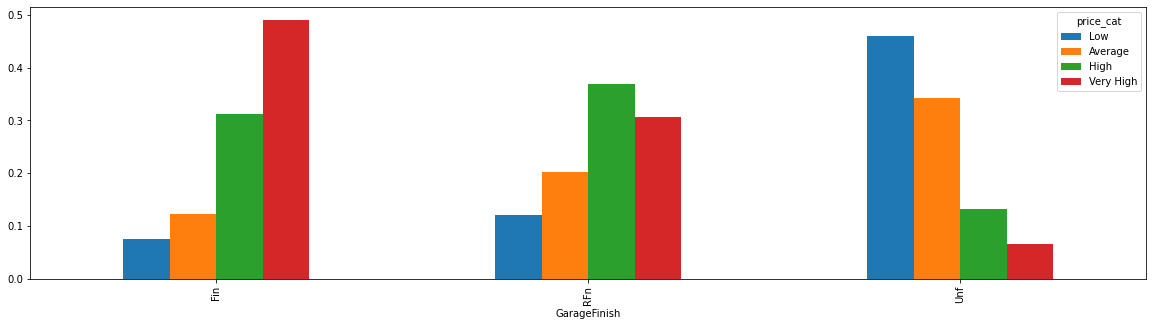

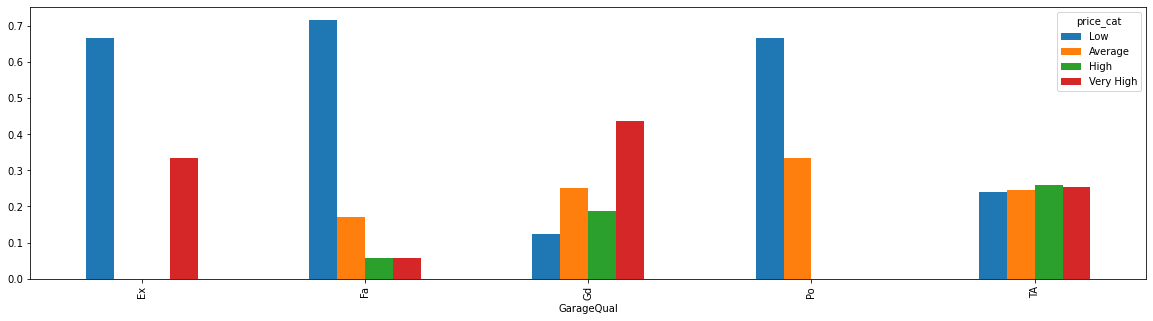

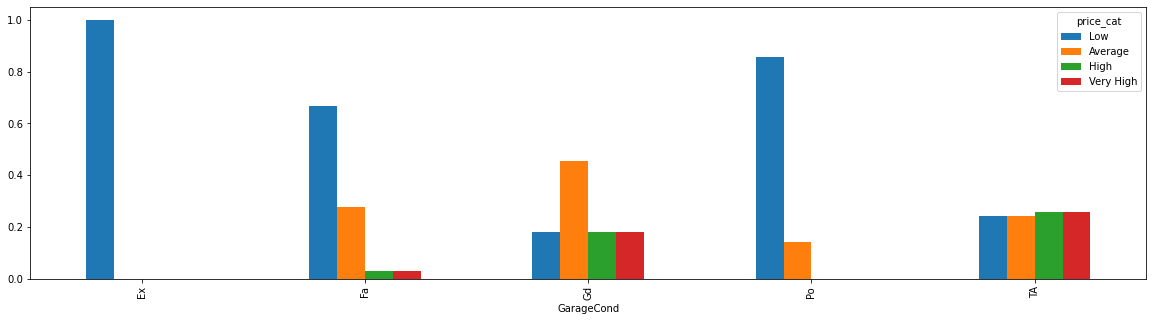

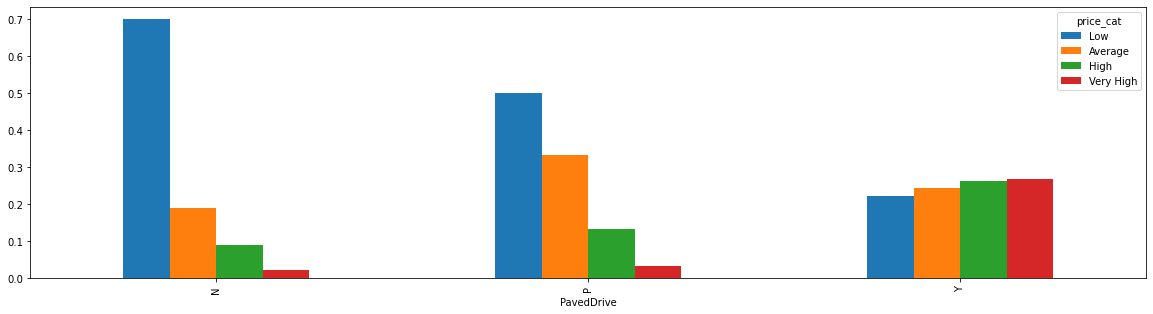

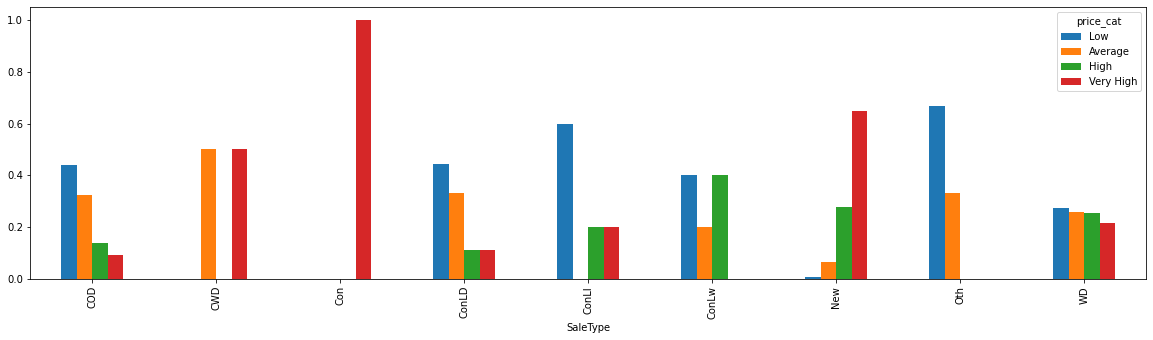

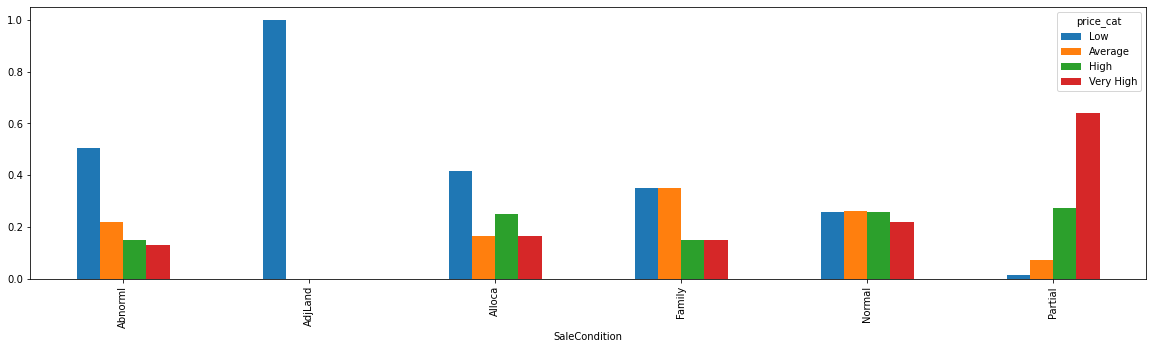

In [27]:
for col in categorical_df_1:
    price_bin=pd.crosstab(categorical_df[col], price_cat) 
    price_bin.div(price_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(20, 5)) 
plt.show()

### Continuous variables visualization 

In [28]:
 numerical_df.drop('Id', 1, inplace=True)

Histograms for the numeric variable 

<function matplotlib.pyplot.show(close=None, block=None)>

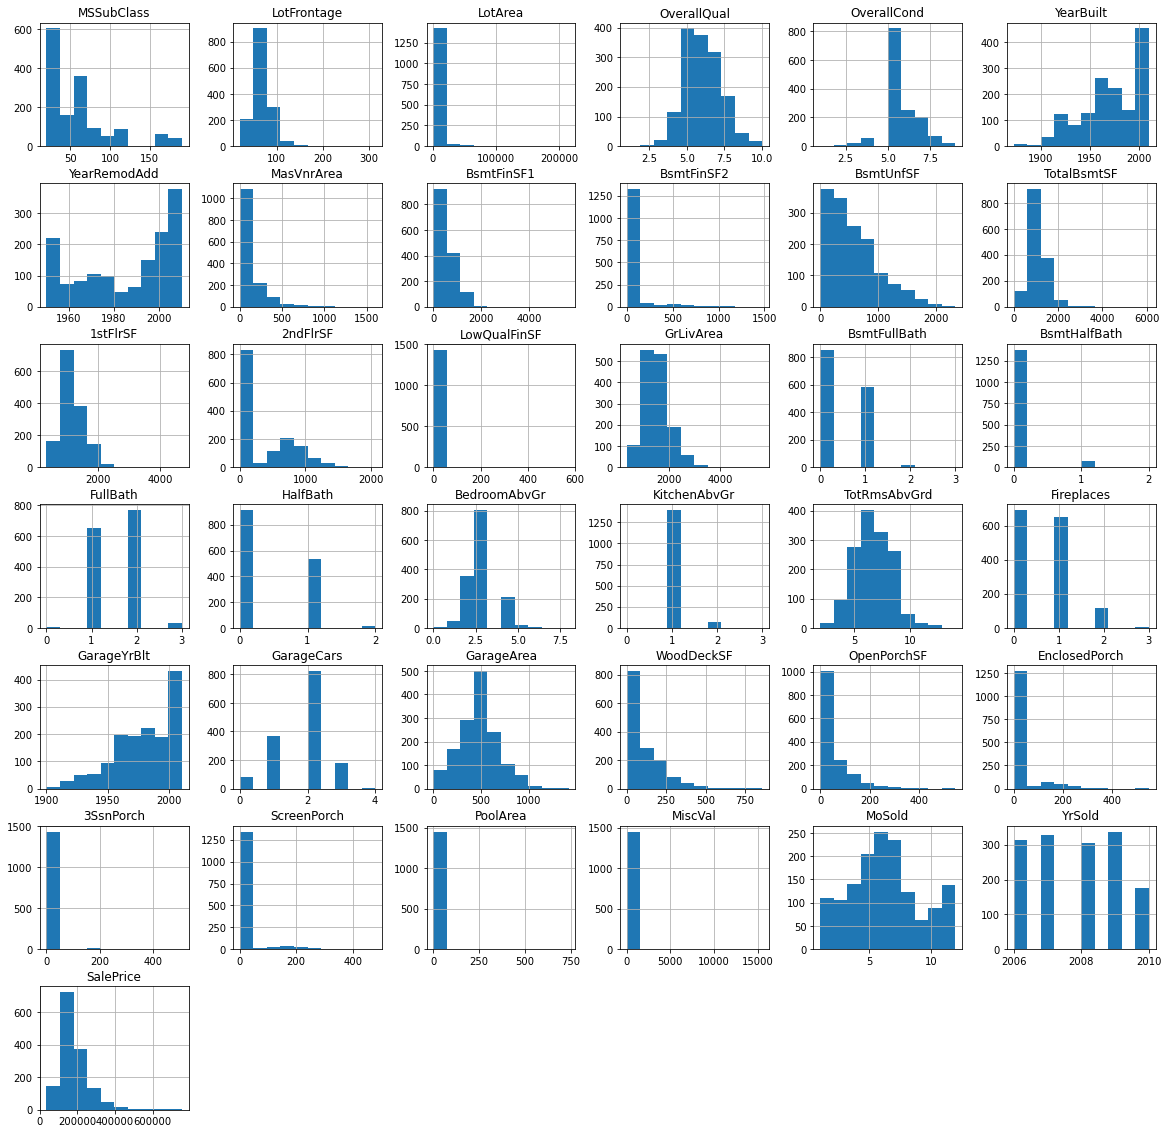

In [29]:
numerical_df.hist(figsize=(20,20))
plt.show

Density plots 

<function matplotlib.pyplot.show(close=None, block=None)>

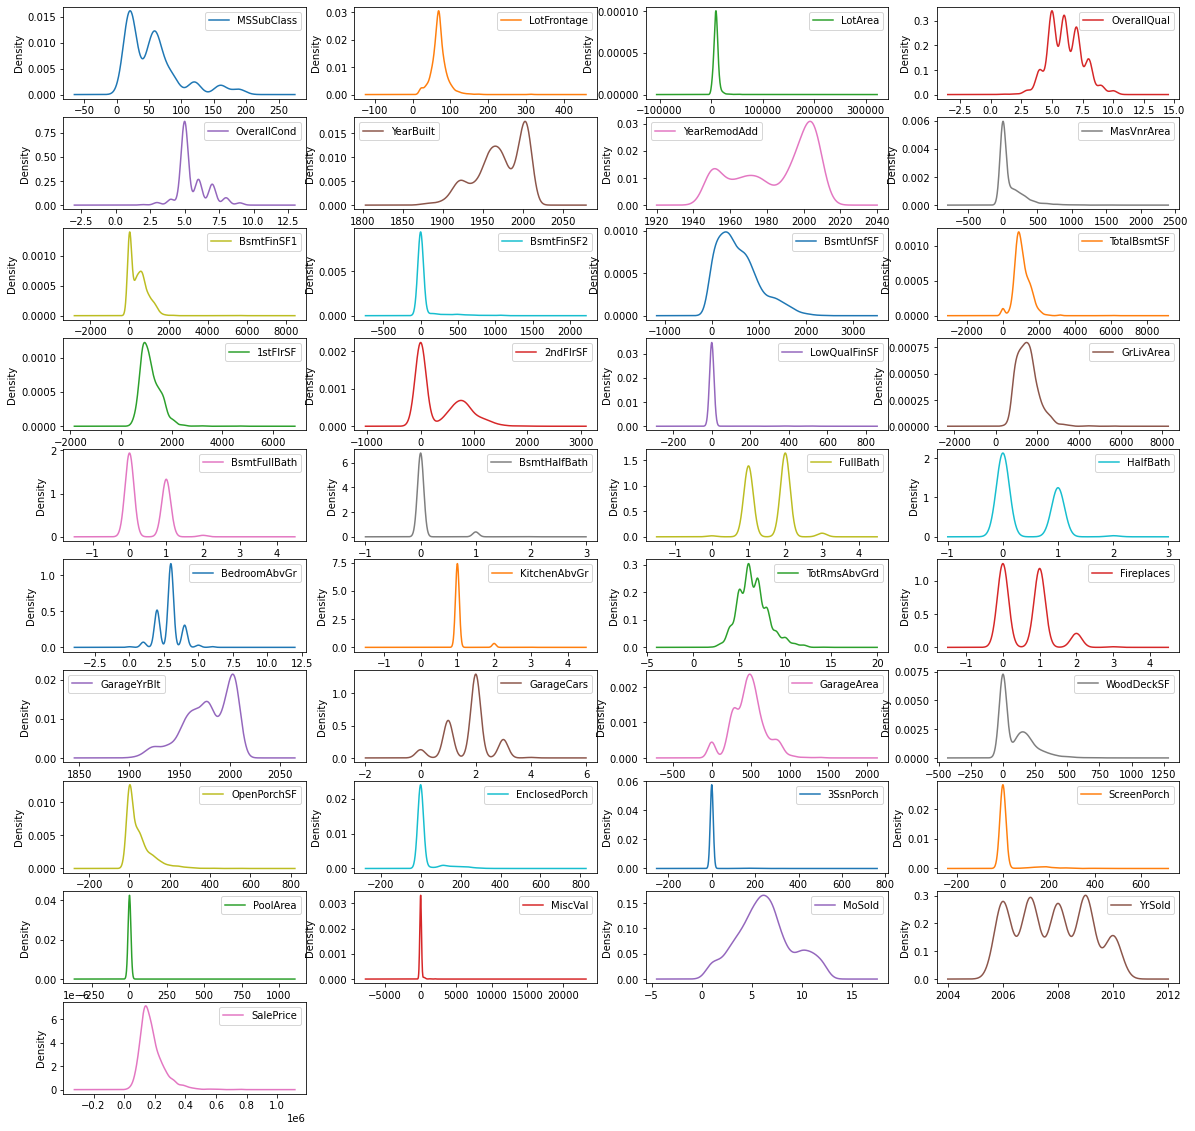

In [30]:
numerical_df.plot(kind='density', layout =(10,4), subplots=True, sharex=False, figsize = (20,20))
plt.show

Box Plots 

<function matplotlib.pyplot.show(close=None, block=None)>

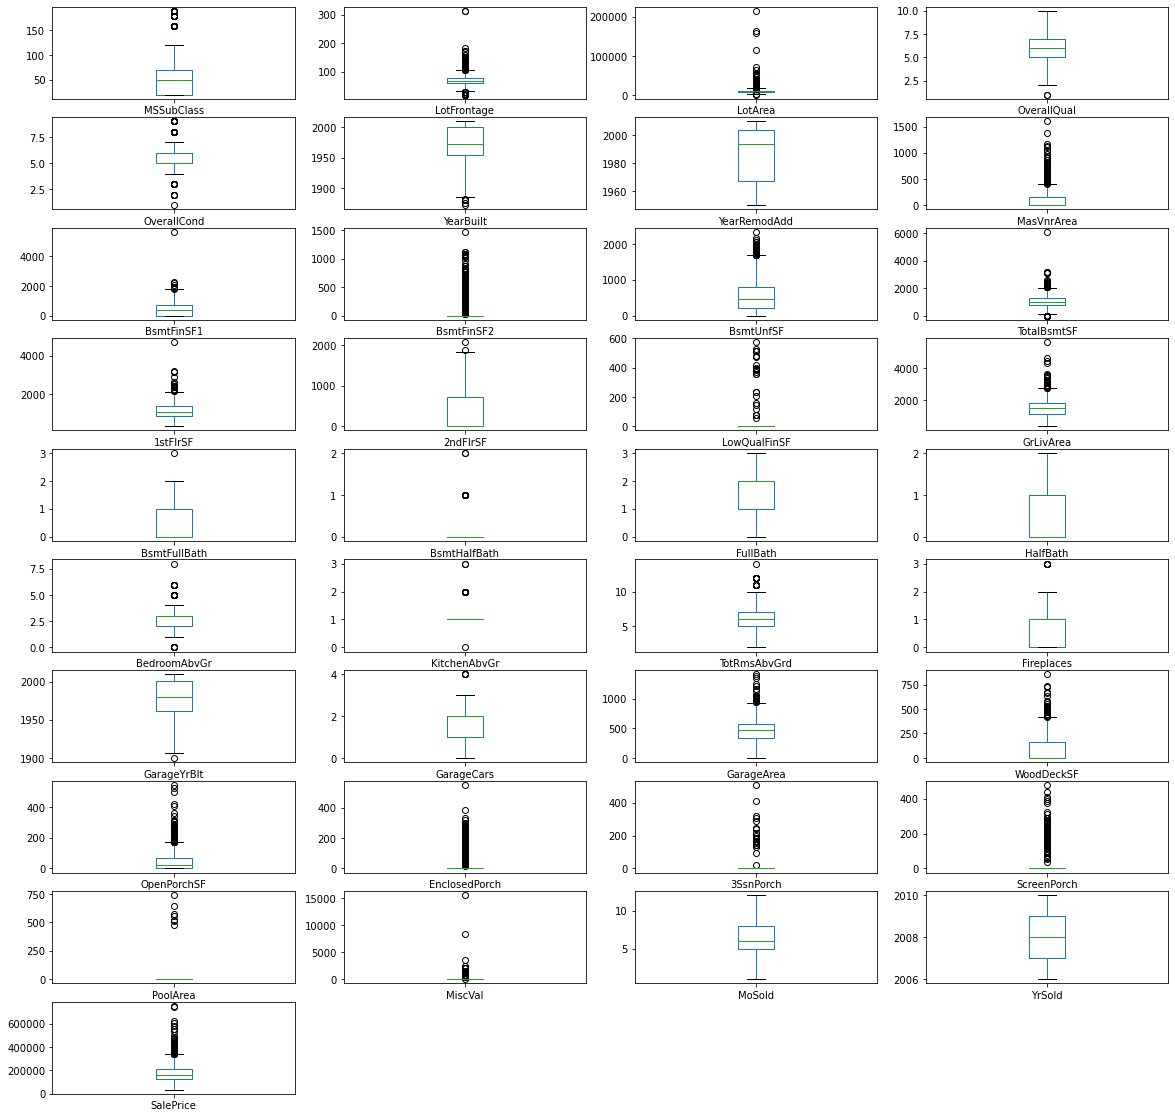

In [31]:
numerical_df.plot(kind='box', layout =(10,4), subplots=True, sharex=False, figsize = (20,20))
plt.show

In [32]:
import plotly.express as px

In [33]:
matrix=numerical_df.corr()
matrix.round(2)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass           1.00        -0.36    -0.14         0.03        -0.06   
LotFrontage         -0.36         1.00     0.30         0.23        -0.05   
LotArea             -0.14         0.30     1.00         0.11        -0.01   
OverallQual          0.03         0.23     0.11         1.00        -0.09   
OverallCond         -0.06        -0.05    -0.01        -0.09         1.00   
YearBuilt            0.03         0.12     0.01         0.57        -0.38   
YearRemodAdd         0.04         0.08     0.01         0.55         0.07   
MasVnrArea           0.02         0.18     0.10         0.41        -0.13   
BsmtFinSF1          -0.07         0.21     0.21         0.24        -0.05   
BsmtFinSF2          -0.07         0.04     0.11        -0.06         0.04   
BsmtUnfSF           -0.14         0.12    -0.00         0.31        -0.14   
TotalBsmtSF         -0.24         0.36     0.26         0.54        -0.17   
1stFlrSF            -0.25         0.41     0.30         0.48        -0.14   
2ndFlrSF             0.31         0.07     0.05         0.30         0.03   
LowQualFinSF         0.05         0.04     0.00        -0.03         0.03   
GrLivArea            0.07         0.37     0.26         0.59        -0.08   
BsmtFullBath         0.00         0.09     0.16         0.11        -0.05   
BsmtHalfBath        -0.00        -0.01     0.05        -0.04         0.12   
FullBath             0.13         0.18     0.13         0.55        -0.19   
HalfBath             0.18         0.05     0.01         0.27        -0.06   
BedroomAbvGr        -0.02         0.24     0.12         0.10         0.01   
KitchenAbvGr         0.28        -0.00    -0.02        -0.18        -0.09   
TotRmsAbvGrd         0.04         0.32     0.19         0.43        -0.06   
Fireplaces          -0.05         0.23     0.27         0.40        -0.02   
GarageYrBlt          0.08         0.06    -0.03         0.51        -0.31   
GarageCars          -0.04         0.27     0.15         0.60        -0.19   
GarageArea          -0.10         0.32     0.18         0.56        -0.15   
WoodDeckSF          -0.01         0.08     0.17         0.24        -0.00   
OpenPorchSF         -0.01         0.14     0.08         0.31        -0.03   
EnclosedPorch       -0.01         0.01    -0.02        -0.11         0.07   
3SsnPorch           -0.04         0.06     0.02         0.03         0.03   
ScreenPorch         -0.03         0.04     0.04         0.06         0.05   
PoolArea             0.01         0.18     0.08         0.07        -0.00   
MiscVal             -0.01        -0.00     0.04        -0.03         0.07   
MoSold              -0.01         0.01     0.00         0.07        -0.00   
YrSold              -0.02         0.01    -0.01        -0.03         0.04   
SalePrice           -0.08         0.33     0.26         0.79        -0.08   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass          0.03          0.04        0.02       -0.07       -0.07   
LotFrontage         0.12          0.08        0.18        0.21        0.04   
LotArea             0.01          0.01        0.10        0.21        0.11   
OverallQual         0.57          0.55        0.41        0.24       -0.06   
OverallCond        -0.38          0.07       -0.13       -0.05        0.04   
YearBuilt           1.00          0.59        0.31        0.25       -0.05   
YearRemodAdd        0.59          1.00        0.18        0.13       -0.07   
MasVnrArea          0.31          0.18        1.00        0.26       -0.07   
BsmtFinSF1          0.25          0.13        0.26        1.00       -0.05   
BsmtFinSF2         -0.05         -0.07       -0.07       -0.05        1.00   
BsmtUnfSF           0.15          0.18        0.11       -0.50       -0.21   
TotalBsmtSF         0.39          0.29        0.36        0.52        0.10   
1stFlrSF            0.28          0.24        0.34        0.45        0.10

In [34]:
px.imshow(matrix.round(2), width=1000, height=1000)

<AxesSubplot:>

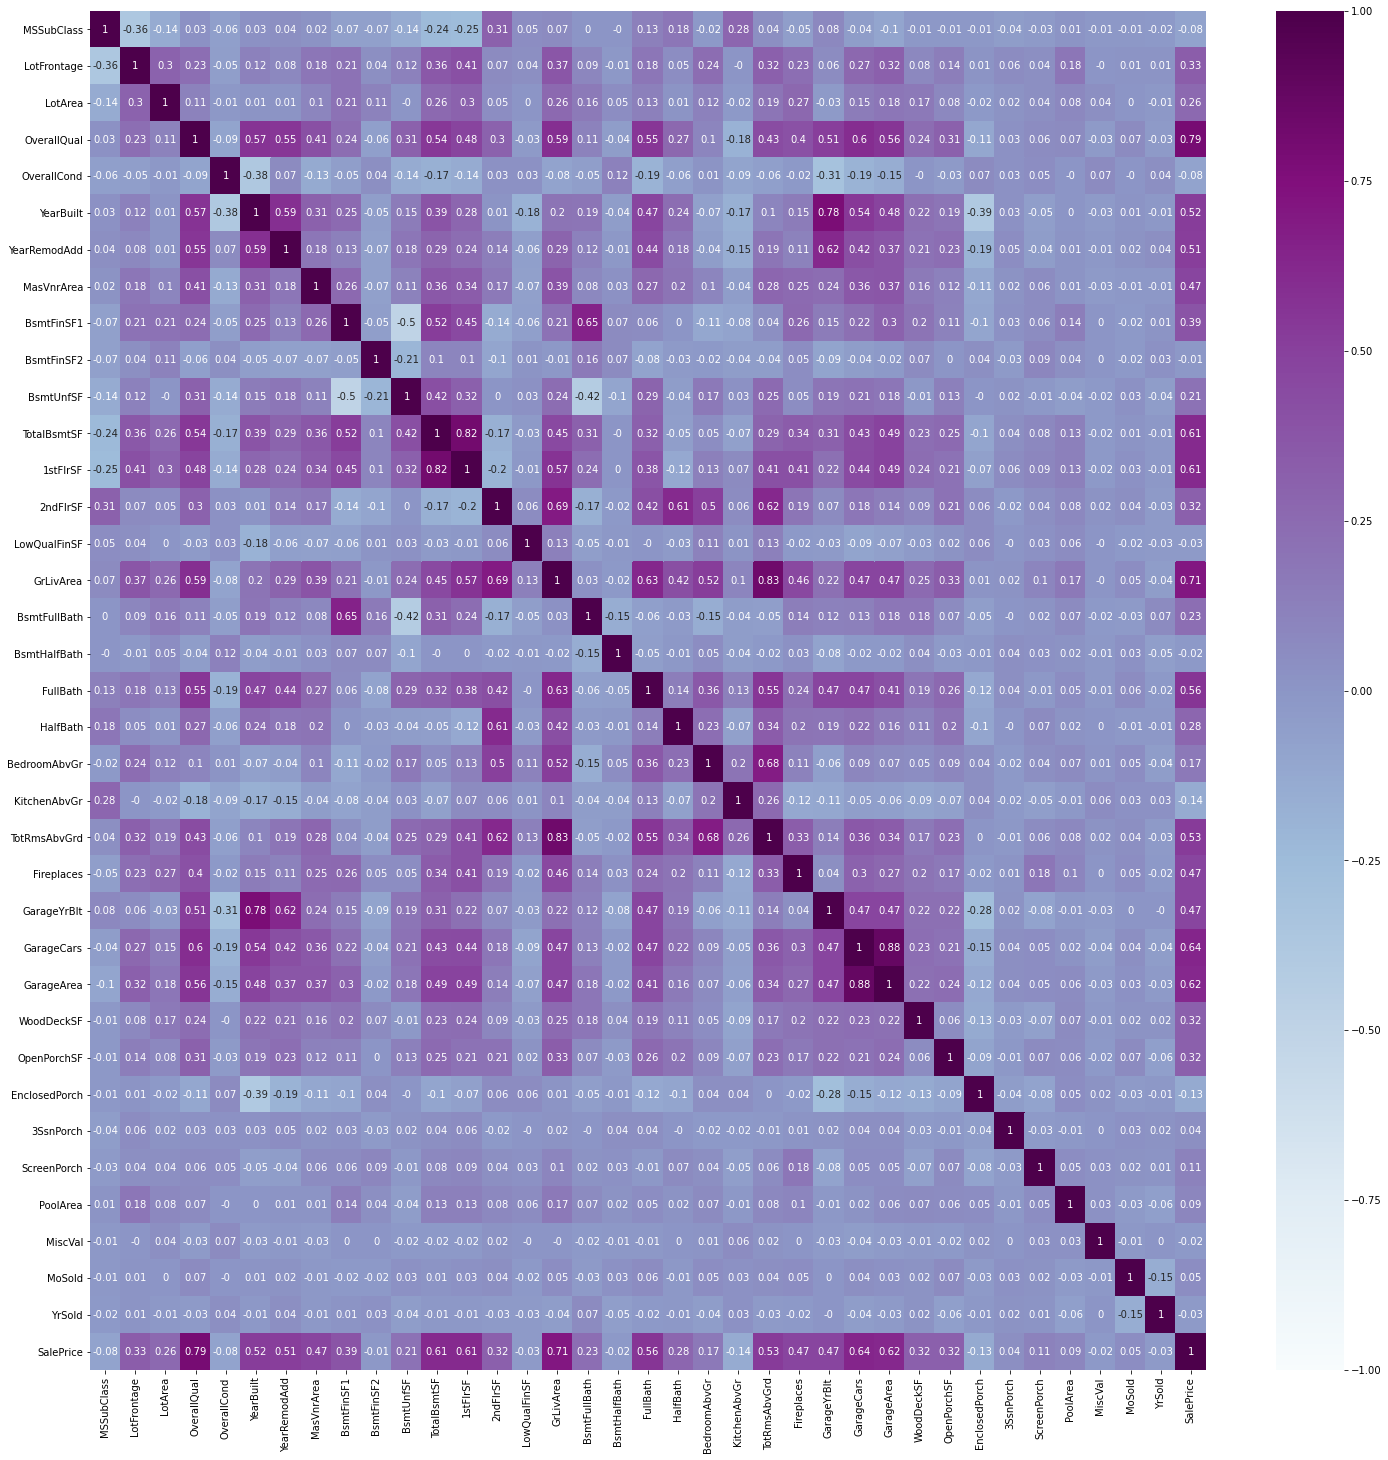

In [35]:
fig = plt.figure(figsize = (25,25))
sns.heatmap(matrix.round(2), vmax=1, vmin=-1, cmap='BuPu',annot=True)

## STATISTICS

In [36]:
import pingouin as pg

### T-Test

saleprice by street

In [37]:
Street_Pave = train_data.SalePrice[train_data.Street=='Pave']
Street_Gravel = train_data.SalePrice[train_data.Street=='Grvl']
print('mean difference: {:.4f}'.format(Street_Pave.mean()-Street_Gravel.mean()))
result=pg.ttest(Street_Pave,Street_Gravel,correction='auto')
display(result)

mean difference: 50940.0385


T       dof       tail     p-val                   CI95%  \
T-test  1.900788  5.060993  two-sided  0.115048  [-17701.13, 119581.21]   

        cohen-d   BF10     power  
T-test  0.64154  1.406  0.347449

Utilities_A = train_data.SalePrice[train_data.Utilities=='AllPub']
Utilities_N = train_data.SalePrice[train_data.Utilities=='NoSeWa']
print('mean difference: {:.4f}'.format(Utilities_A.mean() - Utilities_N.mean()))
res = pg.ttest(Utilities_A, Utilities_N)
display(res)

### Anova Test

salePrice by PavedDrive

In [38]:
train_data.groupby('PavedDrive')['SalePrice'].mean()

PavedDrive
N    115039.122222
P    132330.000000
Y    186433.973881
Name: SalePrice, dtype: float64

In [39]:
aov = pg.anova(data=train_data, dv='SalePrice', between='PavedDrive', detailed=True)
aov

Source            SS    DF            MS          F         p-unc  \
0  PavedDrive  5.021970e+11     2  2.510985e+11  42.024179  1.803569e-18   
1      Within  8.705714e+12  1457  5.975096e+09        NaN           NaN   

       np2  
0  0.05454  
1      NaN

pairwise comparison

In [40]:
pt = pg.pairwise_tukey(data=train_data, dv='SalePrice', between='PavedDrive')
pt

A  B        mean(A)        mean(B)          diff            se         T  \
0  N  P  115039.122222  132330.000000 -17290.877778  16296.005841 -1.061050   
1  N  Y  115039.122222  186433.973881 -71394.851658   8417.183507 -8.482036   
2  P  Y  132330.000000  186433.973881 -54103.973881  14269.859192 -3.791486   

    p-tukey    hedges  
0  0.536672 -0.222264  
1  0.001000 -0.923137  
2  0.001000 -0.699550

SalePrice by Salecondition

In [41]:
train_data.groupby('SaleCondition')['SalePrice'].mean()

SaleCondition
Abnorml    146526.623762
AdjLand    104125.000000
Alloca     167377.416667
Family     149600.000000
Normal     175202.219533
Partial    272291.752000
Name: SalePrice, dtype: float64

anova test

In [42]:
aov = pg.anova(data=train_data, dv='SalePrice', between='SaleCondition', detailed=True)
aov

Source            SS    DF            MS          F         p-unc  \
0  SaleCondition  1.247649e+12     5  2.495298e+11  45.578428  7.988268e-44   
1         Within  7.960263e+12  1454  5.474734e+09        NaN           NaN   

        np2  
0  0.135497  
1       NaN

pairwise comparison

In [43]:
pt = pg.pairwise_tukey(data=train_data, dv='SalePrice', between='SaleCondition')
pt.round(2)

A        B    mean(A)    mean(B)       diff        se      T  \
0   Abnorml  AdjLand  146526.62  104125.00   42401.62  37721.20   1.12   
1   Abnorml   Alloca  146526.62  167377.42  -20850.79  22592.77  -0.92   
2   Abnorml   Family  146526.62  149600.00   -3073.38  18109.17  -0.17   
3   Abnorml   Normal  146526.62  175202.22  -28675.60   7666.50  -3.74   
4   Abnorml  Partial  146526.62  272291.75 -125765.13   9899.65 -12.70   
5   AdjLand   Alloca  104125.00  167377.42  -63252.42  42718.98  -1.48   
6   AdjLand   Family  104125.00  149600.00  -45475.00  40526.78  -1.12   
7   AdjLand   Normal  104125.00  175202.22  -71077.22  37057.43  -1.92   
8   AdjLand  Partial  104125.00  272291.75 -168166.75  37582.99  -4.47   
9    Alloca   Family  167377.42  149600.00   17777.42  27017.85   0.66   
10   Alloca   Normal  167377.42  175202.22   -7824.80  21466.20  -0.36   
11   Alloca  Partial  167377.42  272291.75 -104914.34  22361.25  -4.69   
12   Family   Normal  149600.00  175202.22  -25602.22  16682.52  -1.53   
13   Family  Partial  149600.00  272291.75 -122691.75  17819.50  -6.89   
14   Normal  Partial  175202.22  272291.75  -97089.53   6954.69 -13.96   

    p-tukey  hedges  
0      0.86    0.57  
1      0.90   -0.28  
2      0.90   -0.04  
3      0.00   -0.39  
4      0.00   -1.69  
5      0.65   -0.81  
6      0.86   -0.59  
7      0.39   -0.96  
8      0.00   -2.26  
9      0.90    0.23  
10     0.90   -0.11  
11     0.00   -1.41  
12     0.62   -0.35  
13     0.00   -1.65  
14     0.00   -1.31

### Feature Engineering 

MSZoning

In [44]:
train_data.MSZoning.value_counts(normalize=True)*100

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

In [45]:
train_data.MSZoning.replace('FV', 'Other', inplace=True)
train_data.MSZoning.replace('RH', 'Other', inplace=True)
train_data.MSZoning.replace('C (all)', 'Other', inplace=True)

test_data.MSZoning.replace('FV', 'Other', inplace=True)
test_data.MSZoning.replace('RH', 'Other', inplace=True)
test_data.MSZoning.replace('C (all)', 'Other', inplace=True)

In [46]:
train_data.MSZoning.value_counts(normalize=True)*100

RL       78.835616
RM       14.931507
Other     6.232877
Name: MSZoning, dtype: float64

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

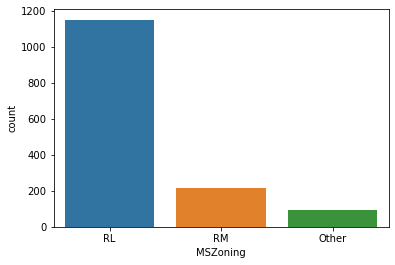

In [47]:
sns.countplot(x=train_data.MSZoning)

Lotshape

In [48]:
train_data.LotShape.value_counts(normalize=True)

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64

In [49]:
### train_data.LotShape.replace({'IR2':'Other','IR3':'Other'} inplace=True)

In [50]:
train_data.LotShape.replace('IR2', 'Other', inplace=True)
train_data.LotShape.replace('IR3', 'Other', inplace=True)

test_data.LotShape.replace('IR2', 'Other', inplace=True)
test_data.LotShape.replace('IR3', 'Other', inplace=True)

In [51]:
train_data.LotShape.value_counts(normalize=True)*100

Reg      63.356164
IR1      33.150685
Other     3.493151
Name: LotShape, dtype: float64

LandContour

In [52]:
train_data.LandContour.value_counts(normalize=True)

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

In [53]:
train_data.LandContour.replace('Bnk', 'Other', inplace=True)
train_data.LandContour.replace('HLS', 'Other', inplace=True)
train_data.LandContour.replace('Low', 'Other', inplace=True)

test_data.LandContour.replace('Bnk', 'Other', inplace=True)
test_data.LandContour.replace('HLS', 'Other', inplace=True)
test_data.LandContour.replace('Low', 'Other', inplace=True)

LotConfig

In [54]:
train_data.LotConfig.value_counts(normalize=True)

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64

In [55]:
train_data.LotConfig.replace('CulDSac', 'Other', inplace=True)
train_data.LotConfig.replace('FR2', 'Other', inplace=True)
train_data.LotConfig.replace('FR3', 'Other', inplace=True)

test_data.LotConfig.replace('CulDSac', 'Other', inplace=True)
test_data.LotConfig.replace('FR2', 'Other', inplace=True)
test_data.LotConfig.replace('FR3', 'Other', inplace=True)

LandSlope

train_data.LandSlope.value_counts(normalize=True)

In [56]:
train_data.LandSlope.replace('Mod', 'Other', inplace=True)
train_data.LandSlope.replace('Sev', 'Other', inplace=True)

test_data.LandSlope.replace('Mod', 'Other', inplace=True)
test_data.LandSlope.replace('Sev', 'Other', inplace=True)

Condition1

In [57]:
train_data.Condition1.value_counts(normalize=True)

Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64

In [58]:
train_data.Condition1.replace('Feedr', 'Other', inplace=True)
train_data.Condition1.replace('Artery', 'Other', inplace=True)
train_data.Condition1.replace('RRAn', 'Other', inplace=True)
train_data.Condition1.replace('PosN', 'Other', inplace=True)
train_data.Condition1.replace('RRAe', 'Other', inplace=True)
train_data.Condition1.replace('PosA', 'Other', inplace=True)
train_data.Condition1.replace('RRNn', 'Other', inplace=True)
train_data.Condition1.replace('RRNe', 'Other', inplace=True)

test_data.Condition1.replace('Feedr', 'Other', inplace=True)
test_data.Condition1.replace('Artery', 'Other', inplace=True)
test_data.Condition1.replace('RRAn', 'Other', inplace=True)
test_data.Condition1.replace('PosN', 'Other', inplace=True)
test_data.Condition1.replace('RRAe', 'Other', inplace=True)
test_data.Condition1.replace('PosA', 'Other', inplace=True)
test_data.Condition1.replace('RRNn', 'Other', inplace=True)
test_data.Condition1.replace('RRNe', 'Other', inplace=True)

Condition2 

In [59]:
train_data.Condition2.value_counts(normalize=True)

Norm      0.989726
Feedr     0.004110
Artery    0.001370
PosN      0.001370
RRNn      0.001370
PosA      0.000685
RRAe      0.000685
RRAn      0.000685
Name: Condition2, dtype: float64

In [60]:
train_data.Condition2.replace('Feedr', 'Other', inplace=True)
train_data.Condition2.replace('Artery', 'Other', inplace=True)
train_data.Condition2.replace('RRAn', 'Other', inplace=True)
train_data.Condition2.replace('PosN', 'Other', inplace=True)
train_data.Condition2.replace('RRAe', 'Other', inplace=True)
train_data.Condition2.replace('PosA', 'Other', inplace=True)
train_data.Condition2.replace('RRNn', 'Other', inplace=True)
train_data.Condition2.replace('RRNe', 'Other', inplace=True)

test_data.Condition2.replace('Feedr', 'Other', inplace=True)
test_data.Condition2.replace('Artery', 'Other', inplace=True)
test_data.Condition2.replace('RRAn', 'Other', inplace=True)
test_data.Condition2.replace('PosN', 'Other', inplace=True)
test_data.Condition2.replace('RRAe', 'Other', inplace=True)
test_data.Condition2.replace('PosA', 'Other', inplace=True)
test_data.Condition2.replace('RRNn', 'Other', inplace=True)
test_data.Condition2.replace('RRNe', 'Other', inplace=True)

In [61]:
train_data.BldgType.value_counts(normalize=True)

1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64

In [62]:
train_data.BldgType.replace('TwnhsE', 'Other', inplace=True)
train_data.BldgType.replace('Duplex', 'Other', inplace=True)
train_data.BldgType.replace('Twnhs', 'Other', inplace=True)
train_data.BldgType.replace('2fmCon', 'Other', inplace=True)

test_data.BldgType.replace('TwnhsE', 'Other', inplace=True)
test_data.BldgType.replace('Duplex', 'Other', inplace=True)
test_data.BldgType.replace('Twnhs', 'Other', inplace=True)
test_data.BldgType.replace('2fmCon', 'Other', inplace=True)

In [63]:
train_data.HouseStyle.value_counts(normalize=True)

1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64

In [64]:
train_data.HouseStyle.replace('SLvl', 'Other', inplace=True)
train_data.HouseStyle.replace('SFoyer', 'Other', inplace=True)
train_data.HouseStyle.replace('1.5Unf', 'Other', inplace=True)
train_data.HouseStyle.replace('2.5Unf', 'Other', inplace=True)
train_data.HouseStyle.replace('2.5Fin', 'Other', inplace=True)

test_data.HouseStyle.replace('SLvl', 'Other', inplace=True)
test_data.HouseStyle.replace('SFoyer', 'Other', inplace=True)
test_data.HouseStyle.replace('1.5Unf', 'Other', inplace=True)
test_data.HouseStyle.replace('2.5Unf', 'Other', inplace=True)
test_data.HouseStyle.replace('2.5Fin', 'Other', inplace=True)

In [65]:
train_data.RoofStyle.value_counts(normalize=True)

Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64

In [66]:
train_data.RoofStyle.replace('Flat', 'Other', inplace=True)
train_data.RoofStyle.replace('Gambrel', 'Other', inplace=True)
train_data.RoofStyle.replace('Mansard', 'Other', inplace=True)
train_data.RoofStyle.replace('Shed', 'Other', inplace=True)

test_data.RoofStyle.replace('Flat', 'Other', inplace=True)
test_data.RoofStyle.replace('Gambrel', 'Other', inplace=True)
test_data.RoofStyle.replace('Mansard', 'Other', inplace=True)
test_data.RoofStyle.replace('Shed', 'Other', inplace=True)

In [67]:
train_data.RoofMatl.value_counts(normalize=True)

CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Roll       0.000685
ClyTile    0.000685
Metal      0.000685
Membran    0.000685
Name: RoofMatl, dtype: float64

In [68]:
train_data.RoofMatl.replace('Tar&Grv', 'Other', inplace=True)
train_data.RoofMatl.replace('WdShngl', 'Other', inplace=True)
train_data.RoofMatl.replace('WdShake', 'Other', inplace=True)
train_data.RoofMatl.replace('Membran', 'Other', inplace=True)
train_data.RoofMatl.replace('ClyTile', 'Other', inplace=True)
train_data.RoofMatl.replace('Metal', 'Other', inplace=True)
train_data.RoofMatl.replace('Roll', 'Other', inplace=True)

test_data.RoofMatl.replace('Tar&Grv', 'Other', inplace=True)
test_data.RoofMatl.replace('WdShngl', 'Other', inplace=True)
test_data.RoofMatl.replace('WdShake', 'Other', inplace=True)
test_data.RoofMatl.replace('Membran', 'Other', inplace=True)
test_data.RoofMatl.replace('ClyTile', 'Other', inplace=True)
test_data.RoofMatl.replace('Metal', 'Other', inplace=True)
test_data.RoofMatl.replace('Roll', 'Other', inplace=True)

In [69]:
train_data.Exterior1st.value_counts(normalize=True)

VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
ImStucc    0.000685
CBlock     0.000685
AsphShn    0.000685
Name: Exterior1st, dtype: float64

In [70]:
train_data.Exterior1st.replace('Plywood', 'Other', inplace=True)
train_data.Exterior1st.replace('CemntBd', 'Other', inplace=True)
train_data.Exterior1st.replace('BrkFace', 'Other', inplace=True)
train_data.Exterior1st.replace('WdShing', 'Other', inplace=True)
train_data.Exterior1st.replace('Stucco', 'Other', inplace=True)
train_data.Exterior1st.replace('AsbShng', 'Other', inplace=True)
train_data.Exterior1st.replace('Stone', 'Other', inplace=True)
train_data.Exterior1st.replace('ImStucc', 'Other', inplace=True)
train_data.Exterior1st.replace('BrkComm', 'Other', inplace=True)
train_data.Exterior1st.replace('CBlock', 'Other', inplace=True)
train_data.Exterior1st.replace('AsphShn', 'Other', inplace=True)

test_data.Exterior1st.replace('Plywood', 'Other', inplace=True)
test_data.Exterior1st.replace('CemntBd', 'Other', inplace=True)
test_data.Exterior1st.replace('BrkFace', 'Other', inplace=True)
test_data.Exterior1st.replace('WdShing', 'Other', inplace=True)
test_data.Exterior1st.replace('Stucco', 'Other', inplace=True)
test_data.Exterior1st.replace('AsbShng', 'Other', inplace=True)
test_data.Exterior1st.replace('Stone', 'Other', inplace=True)
test_data.Exterior1st.replace('ImStucc', 'Other', inplace=True)
test_data.Exterior1st.replace('BrkComm', 'Other', inplace=True)
test_data.Exterior1st.replace('CBlock', 'Other', inplace=True)
test_data.Exterior1st.replace('AsphShn', 'Other', inplace=True)

In [71]:
train_data.Exterior2nd.value_counts(normalize=True)

VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
CBlock     0.000685
Other      0.000685
Name: Exterior2nd, dtype: float64

In [72]:
train_data.Exterior2nd.replace('Plywood', 'Other', inplace=True)
train_data.Exterior2nd.replace('CemntBd', 'Other', inplace=True)
train_data.Exterior2nd.replace('BrkFace', 'Other', inplace=True)
train_data.Exterior2nd.replace('WdShing', 'Other', inplace=True)
train_data.Exterior2nd.replace('Stucco', 'Other', inplace=True)
train_data.Exterior2nd.replace('AsbShng', 'Other', inplace=True)
train_data.Exterior2nd.replace('Stone', 'Other', inplace=True)
train_data.Exterior2nd.replace('ImStucc', 'Other', inplace=True)
train_data.Exterior2nd.replace('BrkComm', 'Other', inplace=True)
train_data.Exterior2nd.replace('CBlock', 'Other', inplace=True)
train_data.Exterior2nd.replace('AsphShn', 'Other', inplace=True)

test_data.Exterior2nd.replace('Plywood', 'Other', inplace=True)
test_data.Exterior2nd.replace('CemntBd', 'Other', inplace=True)
test_data.Exterior2nd.replace('BrkFace', 'Other', inplace=True)
test_data.Exterior2nd.replace('WdShing', 'Other', inplace=True)
test_data.Exterior2nd.replace('Stucco', 'Other', inplace=True)
test_data.Exterior2nd.replace('AsbShng', 'Other', inplace=True)
test_data.Exterior2nd.replace('Stone', 'Other', inplace=True)
test_data.Exterior2nd.replace('ImStucc', 'Other', inplace=True)
test_data.Exterior2nd.replace('BrkComm', 'Other', inplace=True)
test_data.Exterior2nd.replace('CBlock', 'Other', inplace=True)
test_data.Exterior2nd.replace('AsphShn', 'Other', inplace=True)

In [73]:
train_data.ExterQual.value_counts(normalize=True)

TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64

In [74]:
train_data.ExterQual.replace('Ex', 'Other', inplace=True)
train_data.ExterQual.replace('Fa', 'Other', inplace=True)

test_data.ExterQual.replace('Ex', 'Other', inplace=True)
test_data.ExterQual.replace('Fa', 'Other', inplace=True)

In [75]:
train_data.ExterCond.value_counts(normalize=True)

TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64

In [76]:
train_data.ExterCond.replace('Ex', 'Other', inplace=True)
train_data.ExterCond.replace('Fa', 'Other', inplace=True)
train_data.ExterCond.replace('Po', 'Other', inplace=True)

test_data.ExterCond.replace('Ex', 'Other', inplace=True)
test_data.ExterCond.replace('Fa', 'Other', inplace=True)
test_data.ExterCond.replace('Po', 'Other', inplace=True)

In [77]:
train_data.Foundation.value_counts(normalize=True)

PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64

In [78]:
train_data.Foundation.replace('Slab', 'Other', inplace=True)
train_data.Foundation.replace('Stone', 'Other', inplace=True)
train_data.Foundation.replace('Wood', 'Other', inplace=True)

test_data.Foundation.replace('Slab', 'Other', inplace=True)
test_data.Foundation.replace('Stone', 'Other', inplace=True)
test_data.Foundation.replace('Wood', 'Other', inplace=True)

In [79]:
train_data.BsmtCond.value_counts(normalize=True)

TA    0.920548
Gd    0.044521
Fa    0.033562
Po    0.001370
Name: BsmtCond, dtype: float64

In [80]:
train_data.BsmtCond.replace('Gd', 'Other', inplace=True)
train_data.BsmtCond.replace('Fa', 'Other', inplace=True)
train_data.BsmtCond.replace('Po', 'Other', inplace=True)

test_data.BsmtCond.replace('Gd', 'Other', inplace=True)
test_data.BsmtCond.replace('Fa', 'Other', inplace=True)
test_data.BsmtCond.replace('Po', 'Other', inplace=True)

In [81]:
train_data.BsmtFinType2.value_counts(normalize=True)

Unf    0.884247
Rec    0.037671
LwQ    0.032877
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

In [82]:
train_data.BsmtFinType2.replace('Rec', 'Other', inplace=True)
train_data.BsmtFinType2.replace('LwQ', 'Other', inplace=True)
train_data.BsmtFinType2.replace('BLQ', 'Other', inplace=True)
train_data.BsmtFinType2.replace('ALQ', 'Other', inplace=True)
train_data.BsmtFinType2.replace('GLQ', 'Other', inplace=True)

test_data.BsmtFinType2.replace('Rec', 'Other', inplace=True)
test_data.BsmtFinType2.replace('LwQ', 'Other', inplace=True)
test_data.BsmtFinType2.replace('BLQ', 'Other', inplace=True)
test_data.BsmtFinType2.replace('ALQ', 'Other', inplace=True)
test_data.BsmtFinType2.replace('GLQ', 'Other', inplace=True)

In [83]:
train_data.Heating.value_counts(normalize=True)

GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64

In [84]:
train_data.Heating.replace('GasW', 'Other', inplace=True)
train_data.Heating.replace('GasW', 'Other', inplace=True)
train_data.Heating.replace('Grav', 'Other', inplace=True)
train_data.Heating.replace('Wall', 'Other', inplace=True)
train_data.Heating.replace('OthW', 'Other', inplace=True)
train_data.Heating.replace('Floor', 'Other', inplace=True)

test_data.Heating.replace('GasW', 'Other', inplace=True)
test_data.Heating.replace('GasW', 'Other', inplace=True)
test_data.Heating.replace('Grav', 'Other', inplace=True)
test_data.Heating.replace('Wall', 'Other', inplace=True)
test_data.Heating.replace('OthW', 'Other', inplace=True)
test_data.Heating.replace('Floor', 'Other', inplace=True)


In [85]:
train_data.Electrical.value_counts(normalize=True)

SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

In [86]:
train_data.Functional.value_counts(normalize=True)


Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64

In [87]:
train_data.Functional.replace('Min2','Other', inplace=True)
train_data.Functional.replace('Min1','Other', inplace=True)
train_data.Functional.replace('Mod','Other', inplace=True)
train_data.Functional.replace('Maj1','Other', inplace=True)
train_data.Functional.replace('Maj2','Other', inplace=True)
train_data.Functional.replace('Sev','Other', inplace=True)

test_data.Functional.replace('Min2','Other', inplace=True)
test_data.Functional.replace('Min1','Other', inplace=True)
test_data.Functional.replace('Mod','Other', inplace=True)
test_data.Functional.replace('Maj1','Other', inplace=True)
test_data.Functional.replace('Maj2','Other', inplace=True)
test_data.Functional.replace('Sev','Other', inplace=True)

In [88]:
train_data.GarageQual.value_counts(normalize=True)


TA    0.948630
Fa    0.036301
Gd    0.010959
Po    0.002055
Ex    0.002055
Name: GarageQual, dtype: float64

In [89]:
train_data.GarageQual.replace('Fa','Other', inplace=True)
train_data.GarageQual.replace('Gd','Other', inplace=True)
train_data.GarageQual.replace('Po','Other', inplace=True)
train_data.GarageQual.replace('Ex','Other', inplace=True)

test_data.GarageQual.replace('Fa','Other', inplace=True)
test_data.GarageQual.replace('Gd','Other', inplace=True)
test_data.GarageQual.replace('Po','Other', inplace=True)
test_data.GarageQual.replace('Ex','Other', inplace=True)


In [90]:
train_data.GarageCond.value_counts(normalize=True)


TA    0.961644
Fa    0.024658
Gd    0.007534
Po    0.004795
Ex    0.001370
Name: GarageCond, dtype: float64

In [91]:
train_data.GarageCond.replace('Fa','Other', inplace=True)
train_data.GarageCond.replace('Gd','Other', inplace=True)
train_data.GarageCond.replace('Po','Other', inplace=True)
train_data.GarageCond.replace('Ex','Other', inplace=True)

test_data.GarageCond.replace('Fa','Other', inplace=True)
test_data.GarageCond.replace('Gd','Other', inplace=True)
test_data.GarageCond.replace('Po','Other', inplace=True)
test_data.GarageCond.replace('Ex','Other', inplace=True)


In [92]:
train_data.PavedDrive.value_counts(normalize=True)


Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64

In [93]:
train_data.PavedDrive.replace('P','N', inplace=True)

test_data.PavedDrive.replace('P','N', inplace=True)

In [94]:
train_data.SaleType.value_counts(normalize=True)


WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLw    0.003425
ConLI    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64

In [95]:
train_data.SaleType.replace('New','Other', inplace=True)
train_data.SaleType.replace('COD','Other', inplace=True)
train_data.SaleType.replace('ConLD','Other', inplace=True)
train_data.SaleType.replace('ConLw','Other', inplace=True)
train_data.SaleType.replace('ConLI','Other', inplace=True)
train_data.SaleType.replace('CWD','Other', inplace=True)
train_data.SaleType.replace('Oth','Other', inplace=True)
train_data.SaleType.replace('Con','Other', inplace=True)


test_data.SaleType.replace('New','Other', inplace=True)
test_data.SaleType.replace('COD','Other', inplace=True)
test_data.SaleType.replace('ConLD','Other', inplace=True)
test_data.SaleType.replace('ConLw','Other', inplace=True)
test_data.SaleType.replace('ConLI','Other', inplace=True)
test_data.SaleType.replace('CWD','Other', inplace=True)
test_data.SaleType.replace('Oth','Other', inplace=True)
test_data.SaleType.replace('Con','Other', inplace=True)


In [96]:
train_data.SaleCondition.value_counts(normalize=True)


Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

In [97]:
train_data.SaleCondition.replace('Partial','Other', inplace=True)
train_data.SaleCondition.replace('Abnorm','Other', inplace=True)
train_data.SaleCondition.replace('Family','Other', inplace=True)
train_data.SaleCondition.replace('Alloca','Other', inplace=True)
train_data.SaleCondition.replace('AdjLand','Other', inplace=True)

test_data.SaleCondition.replace('Partial','Other', inplace=True)
test_data.SaleCondition.replace('Abnorm','Other', inplace=True)
test_data.SaleCondition.replace('Family','Other', inplace=True)
test_data.SaleCondition.replace('Alloca','Other', inplace=True)
test_data.SaleCondition.replace('AdjLand','Other', inplace=True)

### Machine learning 

In [98]:
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRFRegressor

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [99]:
categorical_df.drop('price_cat', 1, inplace=True)


In [100]:
categorical_df.drop('SalePrice', 1, inplace=True)

In [101]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
def encode():
    le = LabelEncoder()

    for col in categorical_df:
        train_data[col] = le.fit_transform(train_data[col].astype(str))
        test_data[col] = le.transform(test_data[col].astype(str))
    
encode()

In [102]:
train_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         1         65.0     8450       1         2   
1   2          20         1         80.0     9600       1         2   
2   3          60         1         68.0    11250       1         0   
3   4          70         1         60.0     9550       1         0   
4   5          60         1         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          0          1          0             5           0   
1            0          0          2          0            24           1   
2            0          0          1          0             5           0   
3            0          0          0          0             6           0   
4            0          0          2          0            15           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           2            7            5       2003   
1           0         0           1            6            8       1976   
2           0         0           2            7            5       2001   
3           0         0           2            7            5       1915   
4           0         0           2            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          0         0            3            5           1   
1          1976          0         0            1            3           2   
2          2002          0         0            3            5           1   
3          1970          0         0            4            7           2   
4          2000          0         0            3            5           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          0          2           3         2         1   
1         0.0          2          2           1         2         1   
2       162.0          0          2           3         2         1   
3         0.0          2          2           0         3         0   
4       350.0          0          2           3         2         1   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2         706             1           0   
1             1             0         978             1           0   
2             2             2         486             1           0   
3             3             0         216             1           0   
4             0             2         655             1           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        0          0           1           4   
1        284         1262        0          0           1           4   
2        434          920        0          0           1           4   
3        540          756        0          2           1           4   
4        490         1145        0          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4         2         1    

In [103]:
test_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  1461          20         0         80.0    11622       1         2   
1  1462          20         1         81.0    14267       1         0   
2  1463          60         1         74.0    13830       1         0   
3  1464          60         1         78.0     9978       1         0   
4  1465         120         1         43.0     5005       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          0          1          0            12           1   
1            0          0          0          0            12           0   
2            0          0          1          0             8           0   
3            0          0          1          0             8           0   
4            1          0          1          0            22           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           1            5            6       1961   
1           0         0           1            6            6       1958   
2           0         0           2            5            5       1997   
3           0         0           2            6            6       1998   
4           0         1           1            8            5       1992   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1961          0         0            3            5           2   
1          1958          1         0            4            6           1   
2          1998          0         0            3            5           2   
3          1998          0         0            3            5           1   
4          1992          0         0            0            2           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          2          2           1         3         1   
1       108.0          2          2           1         3         1   
2         0.0          2          2           3         2         1   
3        20.0          2          2           3         3         1   
4         0.0          0          2           3         2         1   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             4       468.0             0       144.0   
1             3             0       923.0             1         0.0   
2             3             2       791.0             1         0.0   
3             3             2       602.0             1         0.0   
4             3             0       263.0             1         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      270.0        882.0        0          4           1           4   
1      406.0       1329.0        0          4           1           4   
2      137.0        928.0        0          2           1           4   
3      324.0        926.0        0          0           1           4   
4     1017.0       1280.0        0          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       896         0             0        896           0.0           0.0   
1      1329         0             0       1329           0.0           0.0   
2       928       701             0       1629           0.0           0.0   
3       926       678             0       1604           0.0           0.0   
4      1280         0             0       1280           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            3             5   
1         1         1             3             1            2             6   
2         2         1             3             1            3             6   
3         2         1             3             1            2             7   
4         2    

### Split the data.

In [104]:
X = train_data.drop(['Id', 'SalePrice'], 1)
y = train_data.SalePrice
test_data = test_data.drop('Id', 1)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 74), (1022,), (438, 74), (438,))

#### Training machine learning models. 

Linear Regression

In [132]:
LinReg = LinearRegression().fit(X_train, y_train)
print('R-squared of the training: {:.3f}%'.format(LinReg.score(X_train, y_train)*100))
print('R-squared of the test: {:.3f}%'.format(LinReg.score(X_test, y_test)*100))

R-squared of the training: 83.679%
R-squared of the test: 84.569%


In [107]:
from sklearn.metrics import mean_squared_error
import math

In [108]:
SalePrice_predicted = LinReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 33193.945


Ridge Regression

In [133]:
RidgeReg = Ridge().fit(X_train, y_train)
print('R-squared of the training: {:.3f}%'.format(RidgeReg.score(X_train, y_train)*100))
print('R-squared of the test: {:.3f}%'.format(RidgeReg.score(X_test, y_test)*100))

R-squared of the training: 83.650%
R-squared of the test: 84.716%


In [110]:
SalePrice_predicted = RidgeReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 33035.692


Lasso Regression

In [134]:
LassoReg = Lasso().fit(X_train, y_train)
print('R-squared of the training: {:.3f}%'.format(LassoReg.score(X_train, y_train)*100))
print('R-squared of the test: {:.3f}%'.format(LassoReg.score(X_test, y_test)*100))

R-squared of the training: 83.679%
R-squared of the test: 84.582%


In [112]:
SalePrice_predicted = LassoReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 33180.089


Decision Tree Regression

In [147]:
DTReg = DecisionTreeRegressor(max_depth=10, random_state=1000).fit(X_train, y_train)
print('R-squared of the training: {:.3f}%'.format(DTReg.score(X_train, y_train)*100))
print('R-squared of the test: {:.3f}%'.format(DTReg.score(X_test, y_test)*100))

R-squared of the training: 98.891%
R-squared of the test: 80.696%


In [148]:
SalePrice_predicted = DTReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 37126.438


Random Forest Regression

In [162]:
RFReg = RandomForestRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}%'.format(RFReg.score(X_train, y_train)*100))
print('R-squared of the test: {:.3f}%'.format(RFReg.score(X_test, y_test)*100))

R-squared of the training: 97.134%
R-squared of the test: 90.506%


In [163]:
SalePrice_predicted = RFReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 26036.884


Bagging Regression

In [165]:
BReg = BaggingRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}%'.format(BReg.score(X_train, y_train)*100))
print('R-squared of the test: {:.3f}%'.format(BReg.score(X_test, y_test)*100))

R-squared of the training: 96.764%
R-squared of the test: 89.175%


In [166]:
SalePrice_predicted = BReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 27802.119


Adaboost regression

In [167]:
AReg = AdaBoostRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(AReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(AReg.score(X_test, y_test)))

R-squared of the training: 0.871
R-squared of the test: 0.855


In [168]:
SalePrice_predicted = AReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 32213.394


Gradient Boost Regression

In [173]:
GBReg = GradientBoostingRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(GBReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(GBReg.score(X_test, y_test)))

R-squared of the training: 0.968
R-squared of the test: 0.924


In [174]:
SalePrice_predicted = GBReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 23366.239


XGB Regression

In [175]:
XGBReg = XGBRFRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(XGBReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(XGBReg.score(X_test, y_test)))

R-squared of the training: 0.948
R-squared of the test: 0.896


In [176]:
SalePrice_predicted = XGBReg.predict(X_test)

RMSE = math.sqrt(mean_squared_error(SalePrice_predicted, y_test))
print('RMSE: {:.3f}'.format(RMSE))

RMSE: 27275.009


#### Feature selection 

In [183]:
# Perform feature selection using a univariate statistical test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # use this for classification tasks
from sklearn.feature_selection import f_regression # use this for regression tasks

kbest = SelectKBest(score_func=f_regression, k=26)
kbest.fit(X_train, y_train)

print("Selected features:", list(X.columns[kbest.get_support()]))
print()
print("Removed features:", list(X.columns[~kbest.get_support()]))

dfscores = pd.DataFrame(kbest.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(26,'Score')  #print 50 best features


Selected features: ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition']

Removed features: ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPo

Specs        Score
15    OverallQual  1543.865403
44      GrLivArea   918.059173
58     GarageCars   703.699596
59     GarageArea   623.653647
36    TotalBsmtSF   539.487436
41       1stFlrSF   538.805028
51    KitchenQual   513.321544
47       FullBath   507.985447
28       BsmtQual   485.028166
52   TotRmsAbvGrd   409.708401
25      ExterQual   356.783769
17      YearBuilt   339.109431
18   YearRemodAdd   322.447874
24     MasVnrArea   306.414188
57   GarageFinish   289.737120
27     Foundation   284.373147
54     Fireplaces   260.370354
56    GarageYrBlt   255.650118
38      HeatingQC   176.201153
32     BsmtFinSF1   165.344376
55     GarageType   117.768490
63     WoodDeckSF   108.541716
64    OpenPorchSF   108.128289
2     LotFrontage   107.089287
42       2ndFlrSF   106.709571
73  SaleCondition   103.766621

[1.31838585e-03 1.90642537e-03 5.29439795e-03 1.23766622e-02
 6.71278261e-06 1.45540033e-03 6.73078956e-04 1.07268561e-06
 8.37022330e-04 5.43545379e-04 8.19422016e-03 7.48212776e-04
 1.06266169e-04 2.89538848e-04 4.47049342e-04 5.83280494e-01
 4.45904180e-03 1.00783713e-02 6.36862329e-03 7.76075082e-04
 1.16162970e-04 1.92001516e-03 1.18109483e-03 1.19133976e-03
 6.55067806e-03 1.62471752e-03 4.15029994e-04 6.16793861e-04
 6.01685143e-03 2.75162495e-04 2.24194656e-03 1.26703244e-03
 2.88920470e-02 1.30964533e-04 5.93064682e-04 5.50514495e-03
 4.09196898e-02 6.41812926e-05 7.95977650e-04 3.18524368e-03
 1.84251407e-04 2.28085821e-02 3.98393081e-02 2.07480973e-04
 1.04490966e-01 9.57443659e-04 5.73168945e-04 7.65537901e-03
 9.46024029e-04 1.41015292e-03 1.08372218e-03 2.87111899e-03
 6.11183379e-03 4.14046809e-04 3.37249163e-03 3.51523309e-03
 5.11818987e-03 1.68124144e-03 1.90311925e-02 1.53185502e-02
 9.73512191e-05 1.01504577e-04 4.80631123e-04 4.85662283e-03
 4.72820232e-03 7.605397

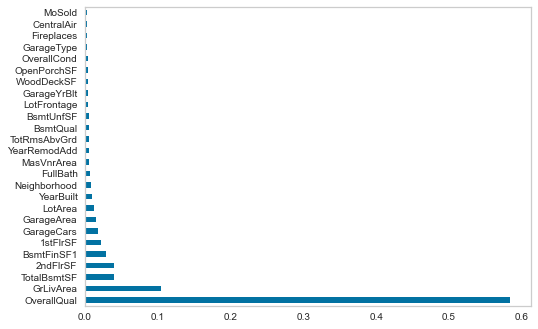

In [181]:
model = RandomForestRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(26).plot(kind='barh')
plt.grid()
plt.show()

In [184]:
X_1 = train_data[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                  'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 
                  '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 
                  'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 
                  'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition']]
y = train_data.SalePrice

test_data = test_data[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 
                       'Foundation', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
                       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 
                       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                       'SaleCondition']]

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1022, 26), (1022,), (438, 26), (438,))

In [186]:
RFReg = RandomForestRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}%'.format(RFReg.score(X_train, y_train)*100))
print('R-squared of the test: {:.3f}%'.format(RFReg.score(X_test, y_test)*100))

R-squared of the training: 97.598%
R-squared of the test: 90.713%


In [187]:
GBReg = GradientBoostingRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}%'.format(GBReg.score(X_train, y_train)*100))
print('R-squared of the test: {:.3f}%'.format(GBReg.score(X_test, y_test)*100))

R-squared of the training: 95.512%
R-squared of the test: 91.285%
